In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import random
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
import numpy as np

In [2]:
def load_tmx_level(tmx_file_path, map_shape=(1, 15, 50)):
    """
    Loads a level from a .tmx file (in XML format with CSV encoding) into a PyTorch tensor.

    Args:
    - tmx_file_path (str): Path to the .tmx file
    - map_shape (tuple): Shape of the tile map (channels, height, width)

    Returns:
    - torch.Tensor: Tensor of shape (1, 15, 50) or similar based on map_shape
    """
    # Parse the XML file
    tree = ET.parse(tmx_file_path)
    root = tree.getroot()

    # Find the data field in the XML structure
    data_field = root.find(".//layer/data[@encoding='csv']")
    if data_field is None:
        raise ValueError("No CSV-encoded tile data found in this .tmx file.")

    # Get the CSV string of tile values
    csv_data = data_field.text.strip()

    # Convert the CSV string into a list of integers
    tile_values = list(map(int, csv_data.split(',')))

    # Reshape the tile values into the map shape (height, width)
    height, width = map_shape[1], map_shape[2]
    if len(tile_values) != height * width:
        raise ValueError(f"Tile data does not match the expected map size: {height}x{width}.")
    
    # Convert to a numpy array and then to a PyTorch tensor
    level = np.array(tile_values, dtype=np.int32).reshape((height, width))
    level_tensor = torch.tensor(level, dtype=torch.long).unsqueeze(0)  # Add channel dimension

    return level_tensor


In [3]:
def load_all_levels_from_folder(folder_path, map_shape=(1, 15, 50)):
    """
    Loads all levels from a folder containing .tmx files into a list of PyTorch tensors.

    Args:
    - folder_path (str): Path to the folder containing .tmx files
    - map_shape (tuple): Shape of the tile map (channels, height, width)

    Returns:
    - list of torch.Tensor: List of tensors, each representing a level
    """
    # List all .tmx files in the directory
    tmx_files = [f for f in os.listdir(folder_path) if f.endswith('.tmx')]
    
    # List to store all levels
    all_levels = []

    # Iterate through each .tmx file and load it
    for tmx_file in tmx_files:
        tmx_file_path = os.path.join(folder_path, tmx_file)
        try:
            # Load the level data from each .tmx file
            level_tensor = load_tmx_level(tmx_file_path, map_shape)
            all_levels.append(level_tensor)
        except ValueError as e:
            print(f"Skipping {tmx_file}: {e}")

    return all_levels

In [4]:
#loading data
folder_path = "./2D game Project/good/"
levels = load_all_levels_from_folder(folder_path, map_shape=(1, 15, 50))

# Check how many levels were loaded
print(f"Loaded {len(levels)} levels.")


float_levels = [level.float() for level in levels]

stacked_levels = torch.stack(float_levels, dim=0)

levels=stacked_levels

Loaded 1303 levels.


In [5]:
# ========== DISPLAY ==========

def plot_level(level, title="Generated Level"):
    level_2d = torch.tensor(level).reshape(15, 50)
    plt.figure(figsize=(12, 3))
    plt.imshow(level_2d, cmap="viridis", aspect="auto")
    plt.colorbar()
    plt.title(title)
    plt.show()


6
Epoch 1/200 | Loss: 0.6464


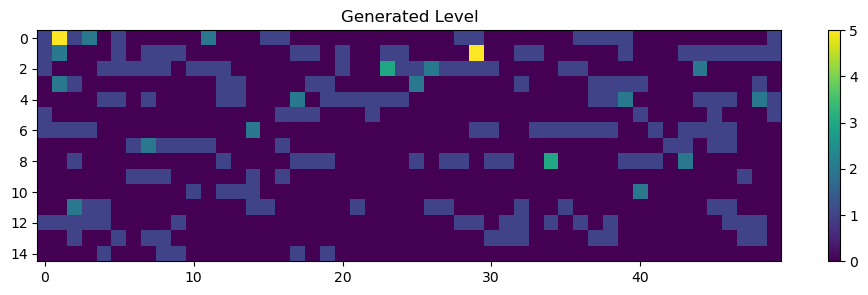

Epoch 2/200 | Loss: 0.1799


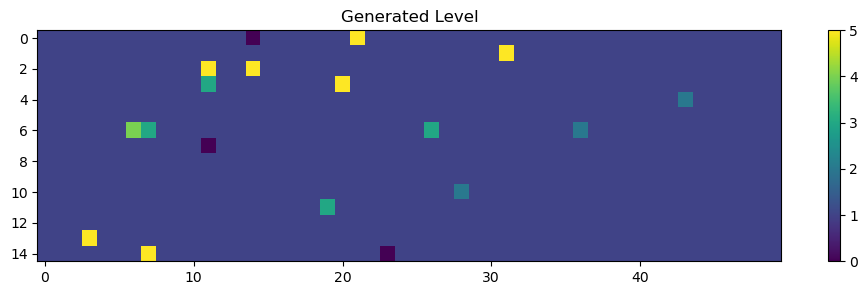

Epoch 3/200 | Loss: 0.1209


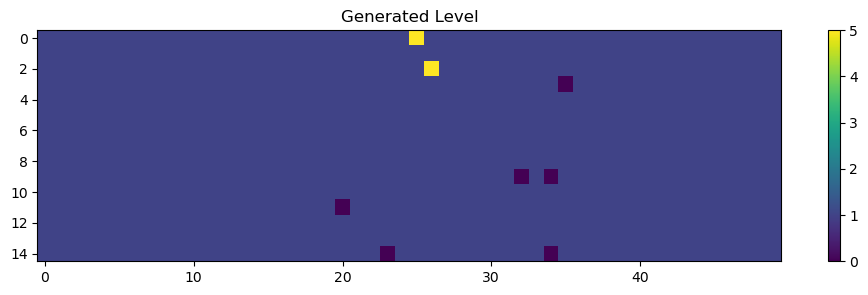

Epoch 4/200 | Loss: 0.1117


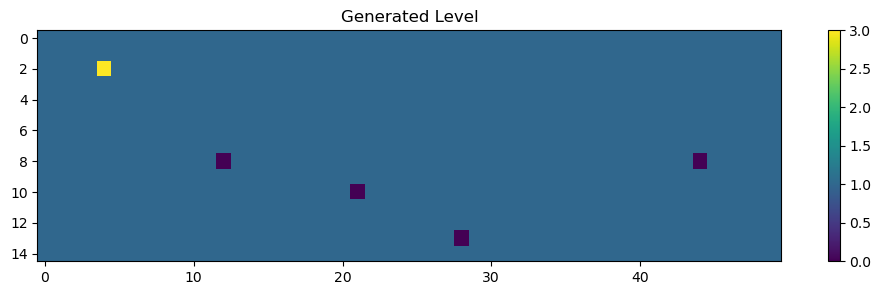

Epoch 5/200 | Loss: 0.1072


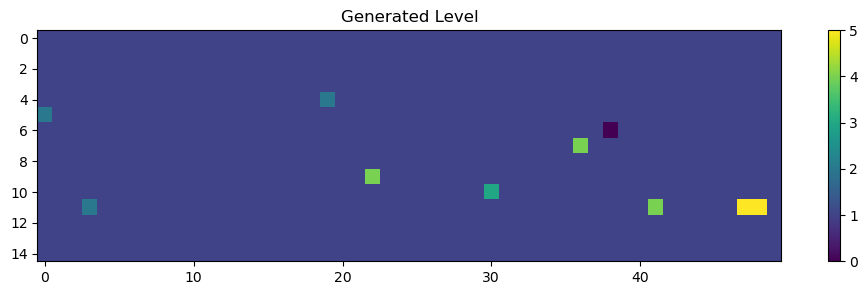

Epoch 6/200 | Loss: 0.1056


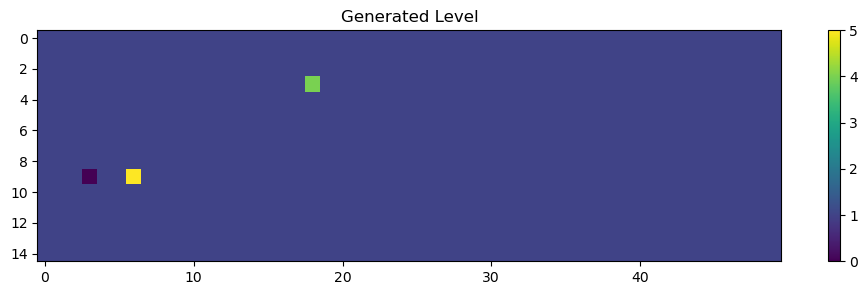

Epoch 7/200 | Loss: 0.1017


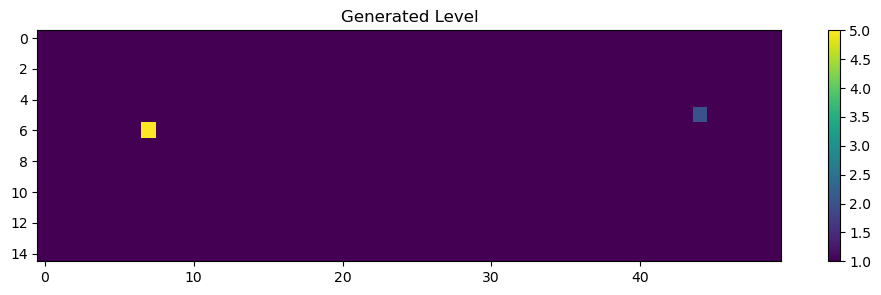

Epoch 8/200 | Loss: 0.0967


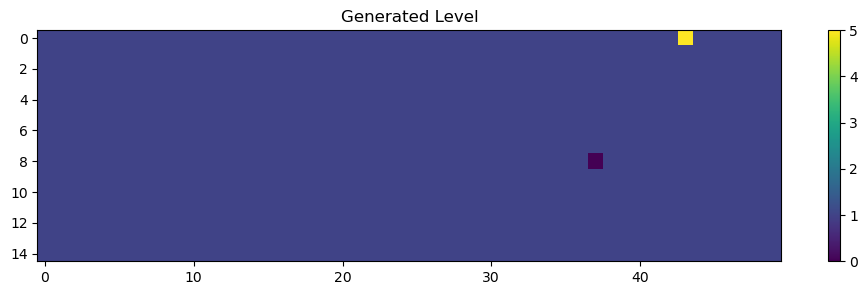

Epoch 9/200 | Loss: 0.0923


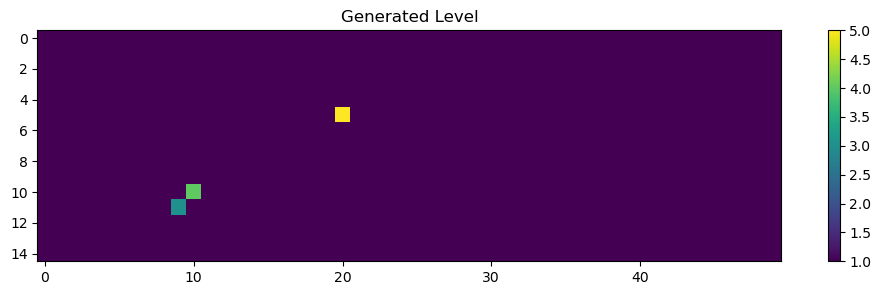

Epoch 10/200 | Loss: 0.0888


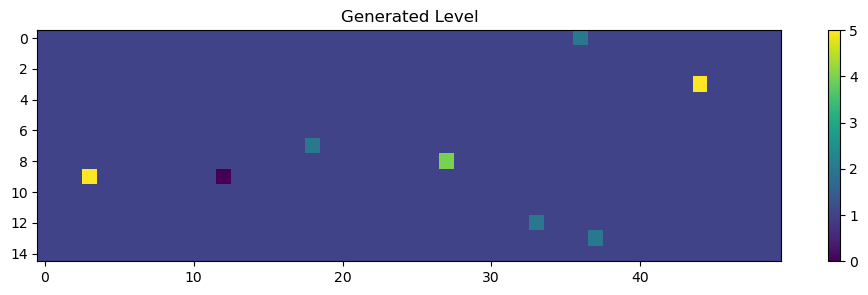

Epoch 11/200 | Loss: 0.0859


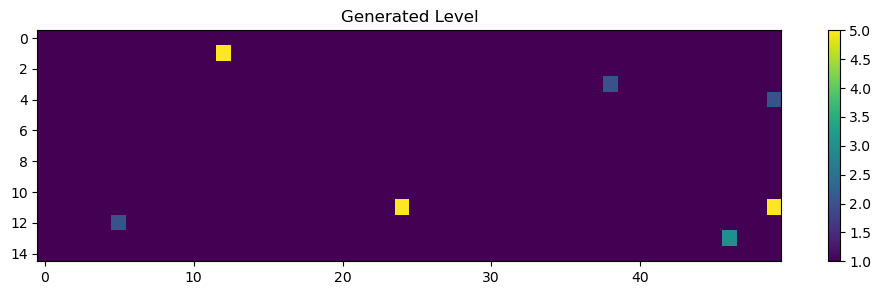

Epoch 12/200 | Loss: 0.0834


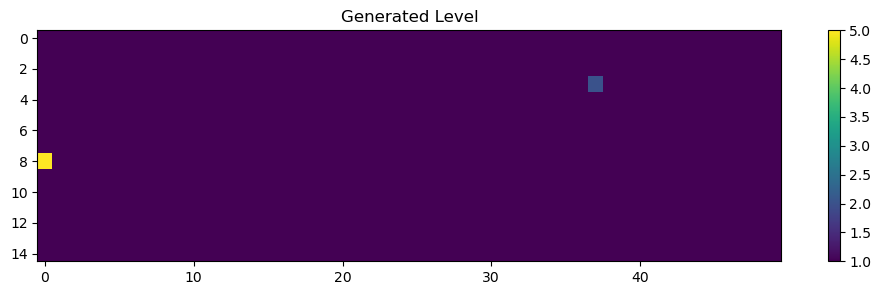

Epoch 13/200 | Loss: 0.0802


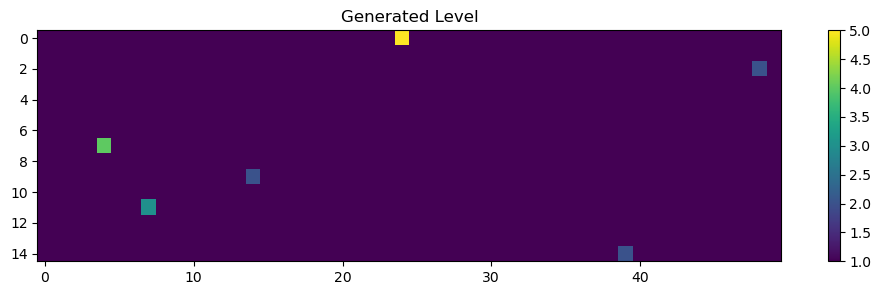

Epoch 14/200 | Loss: 0.0778


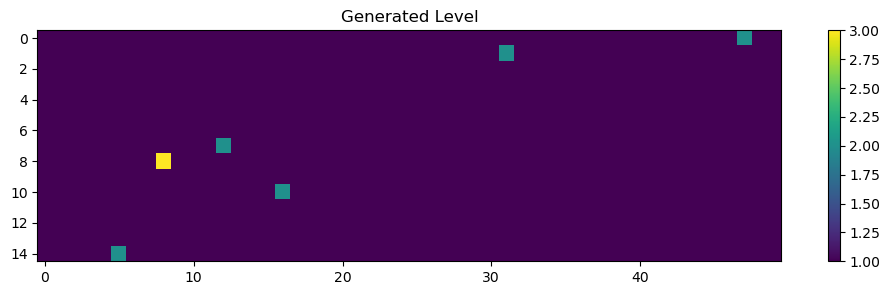

Epoch 15/200 | Loss: 0.0753


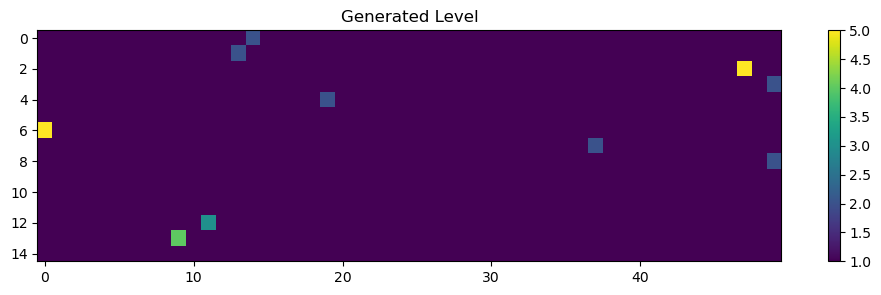

Epoch 16/200 | Loss: 0.0739


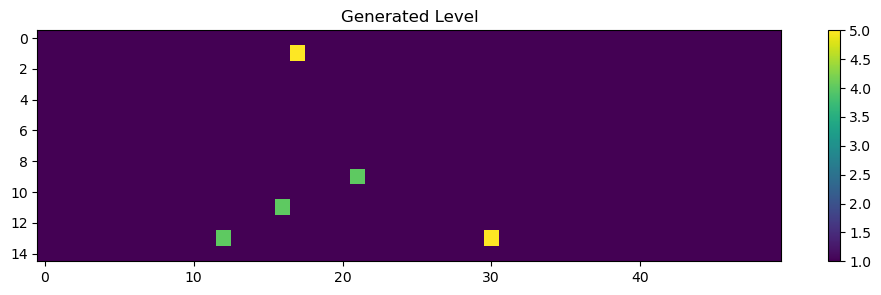

Epoch 17/200 | Loss: 0.0703


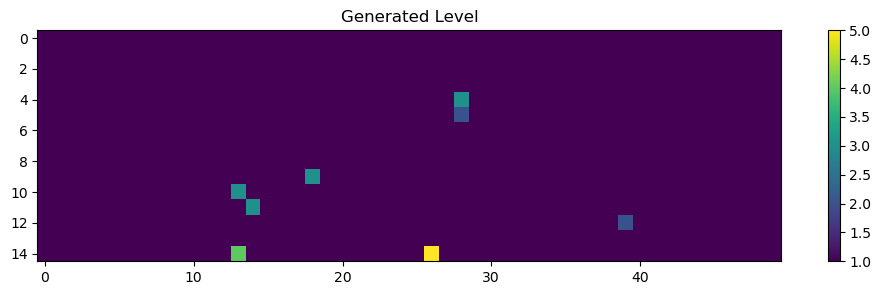

Epoch 18/200 | Loss: 0.0672


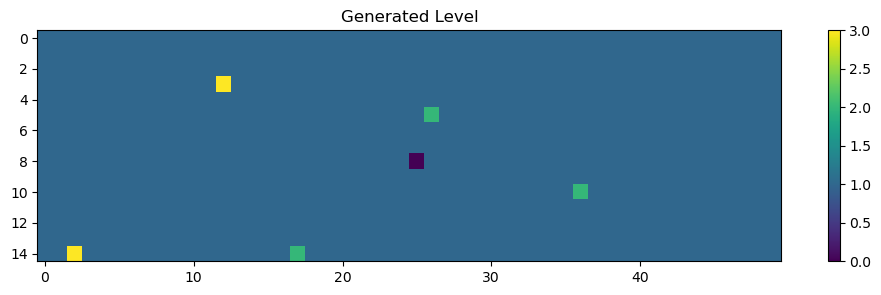

Epoch 19/200 | Loss: 0.0650


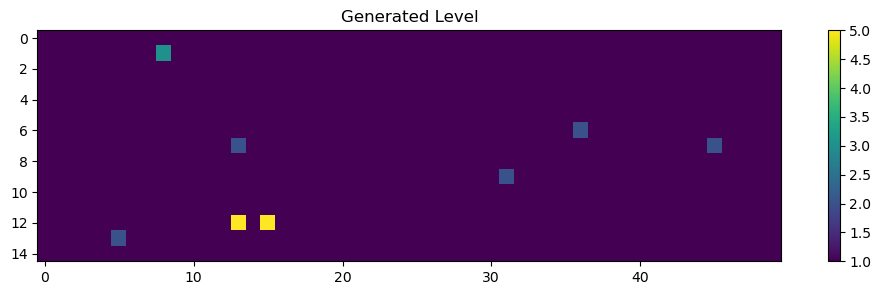

Epoch 20/200 | Loss: 0.0613


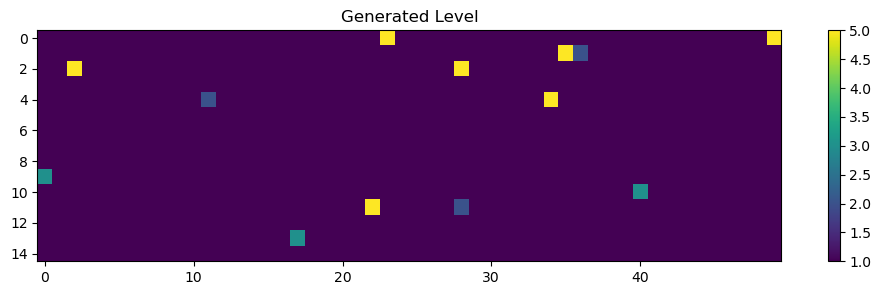

Epoch 21/200 | Loss: 0.0589


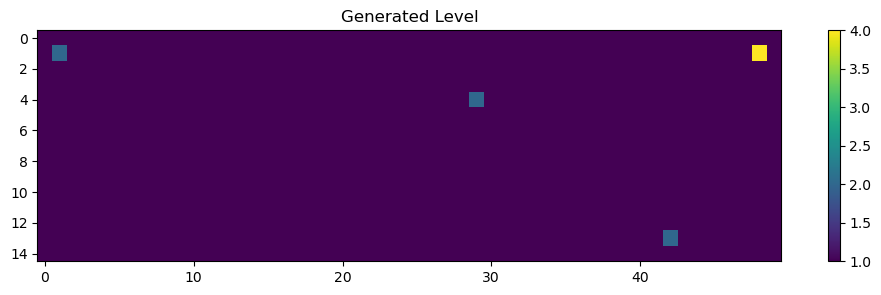

Epoch 22/200 | Loss: 0.0550


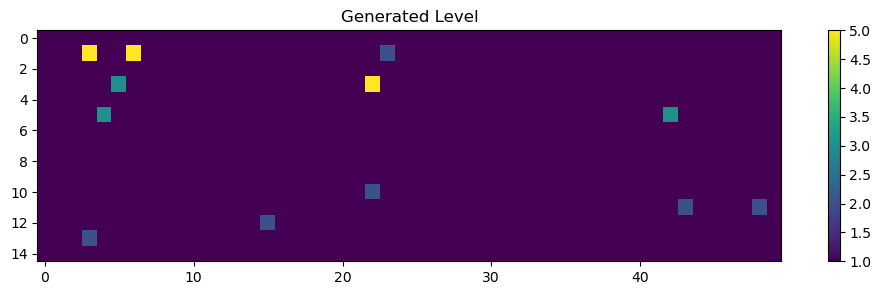

Epoch 23/200 | Loss: 0.0527


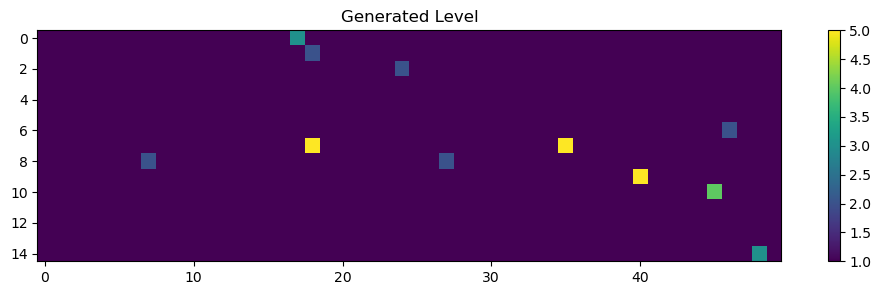

Epoch 24/200 | Loss: 0.0490


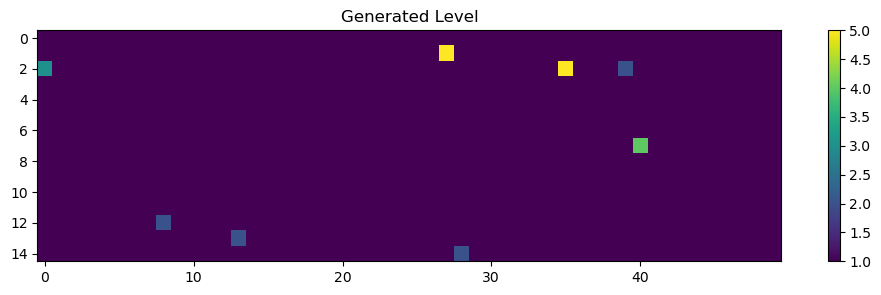

Epoch 25/200 | Loss: 0.0462


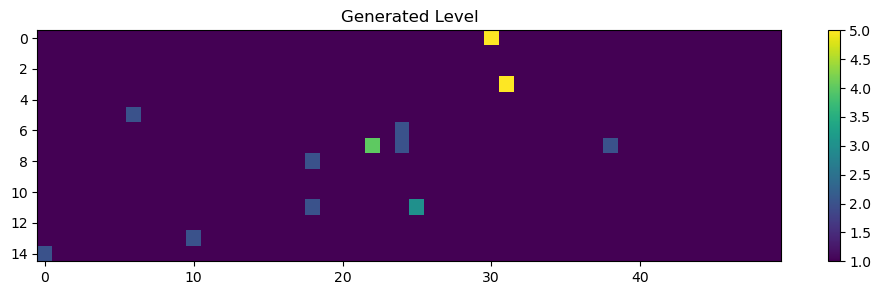

Epoch 26/200 | Loss: 0.0425


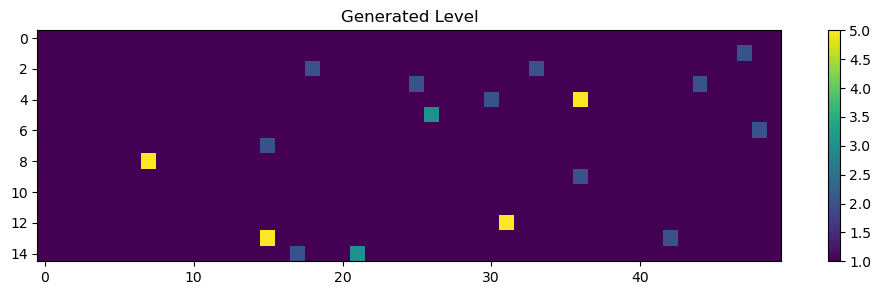

Epoch 27/200 | Loss: 0.0401


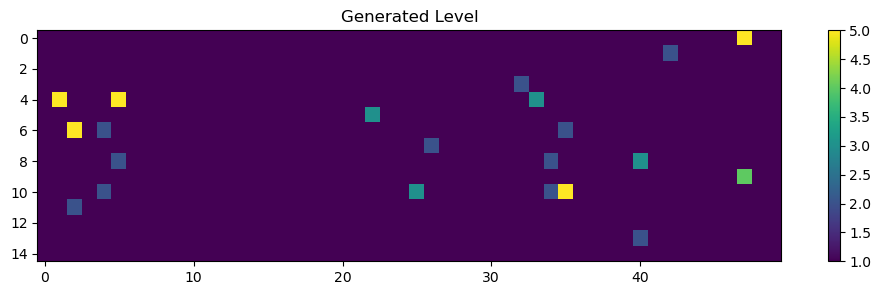

Epoch 28/200 | Loss: 0.0363


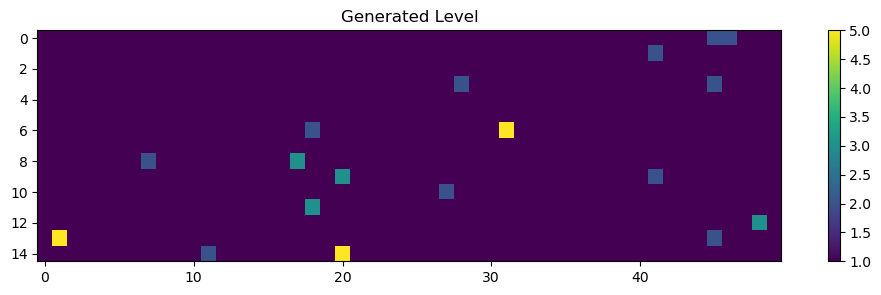

Epoch 29/200 | Loss: 0.0333


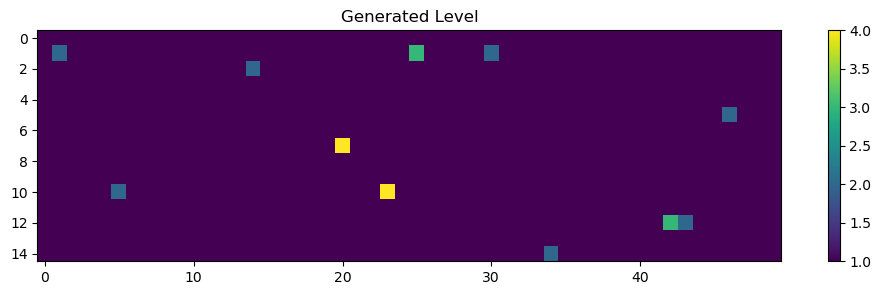

Epoch 30/200 | Loss: 0.0314


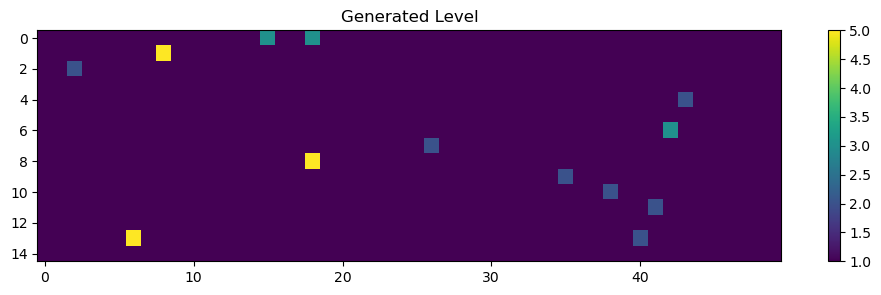

Epoch 31/200 | Loss: 0.0291


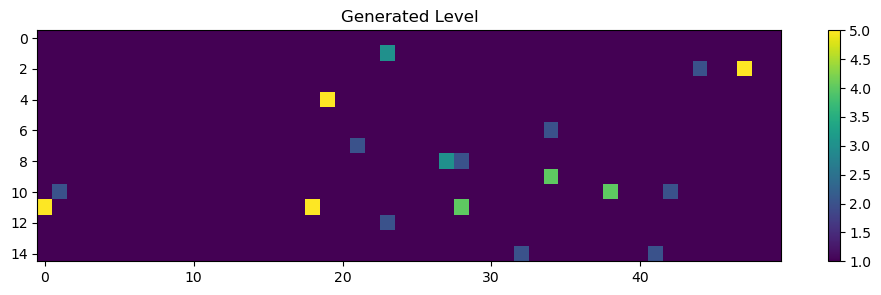

Epoch 32/200 | Loss: 0.0277


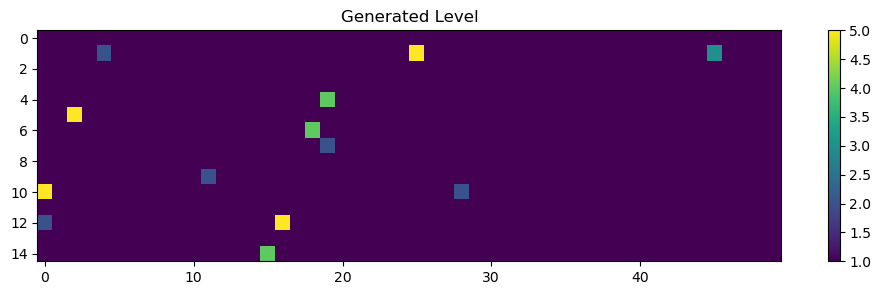

Epoch 33/200 | Loss: 0.0244


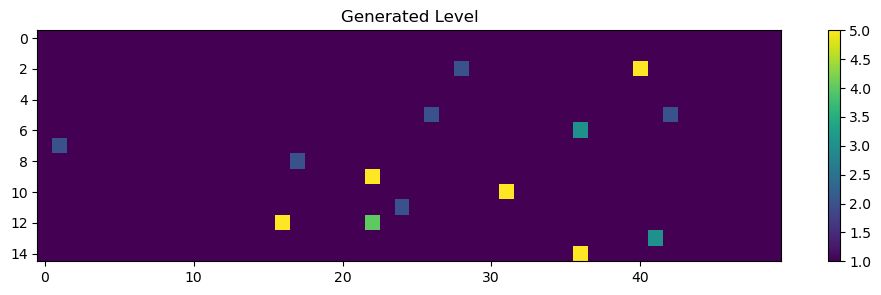

Epoch 34/200 | Loss: 0.0224


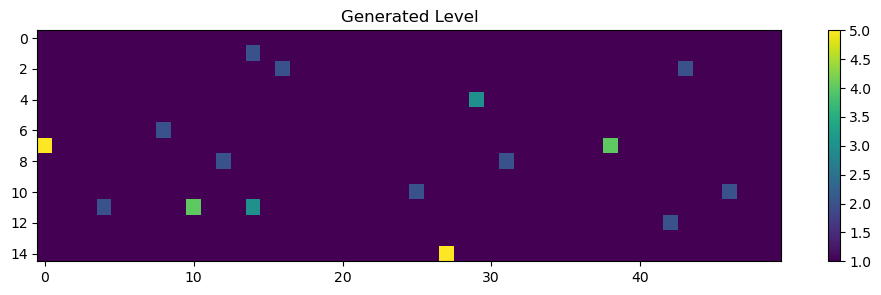

Epoch 35/200 | Loss: 0.0203


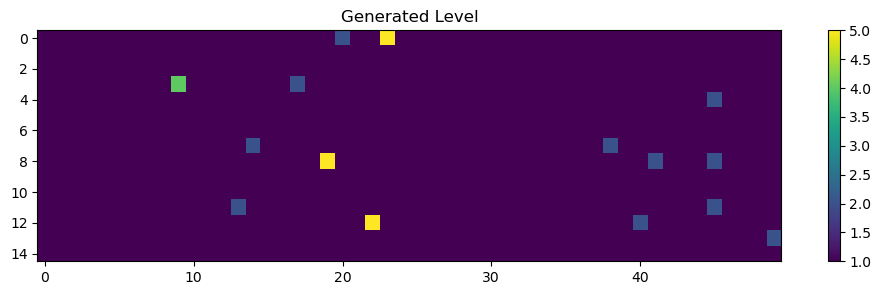

Epoch 36/200 | Loss: 0.0183


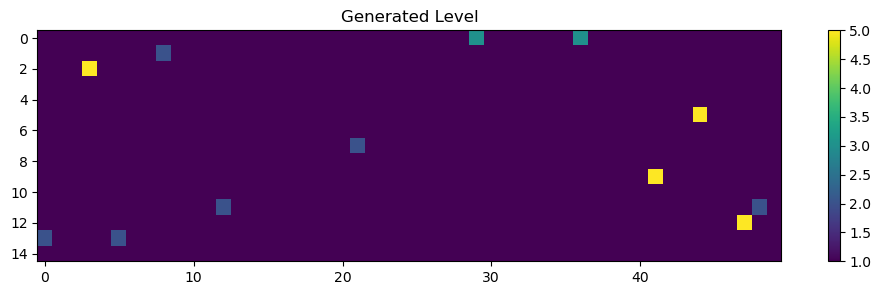

Epoch 37/200 | Loss: 0.0167


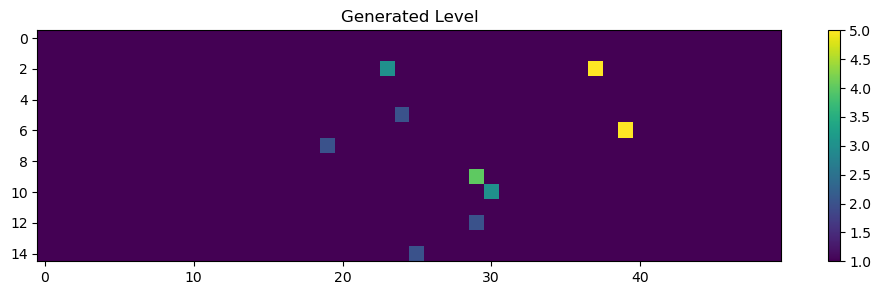

Epoch 38/200 | Loss: 0.0155


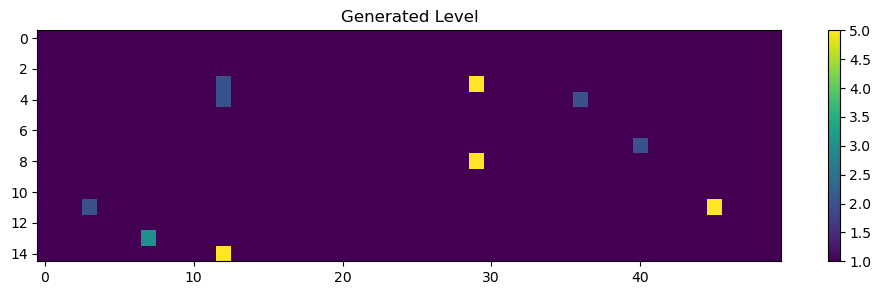

Epoch 39/200 | Loss: 0.0139


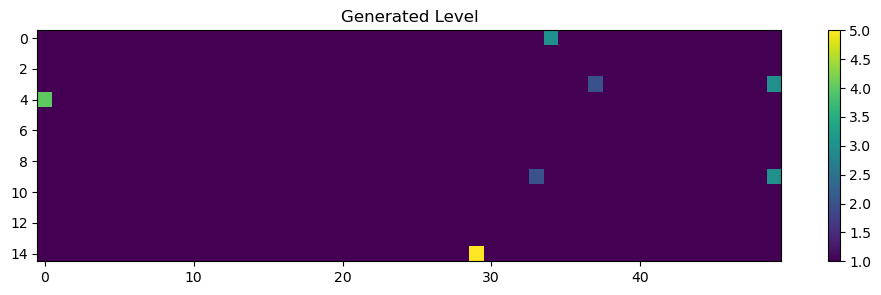

Epoch 40/200 | Loss: 0.0130


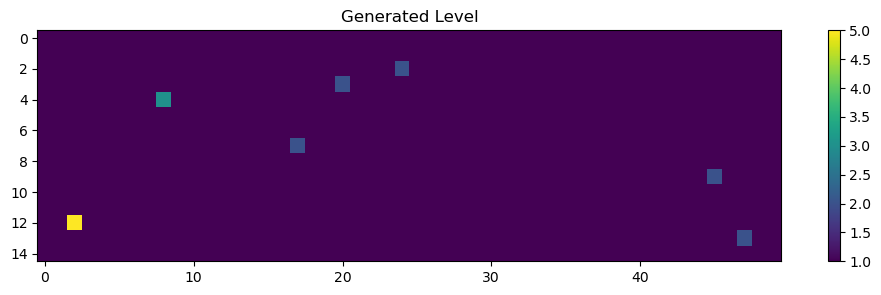

Epoch 41/200 | Loss: 0.0117


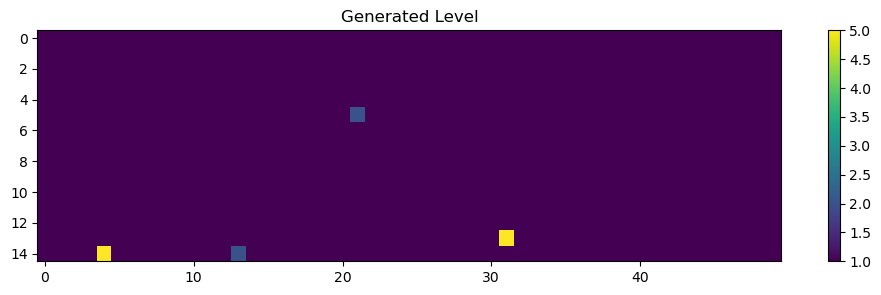

Epoch 42/200 | Loss: 0.0111


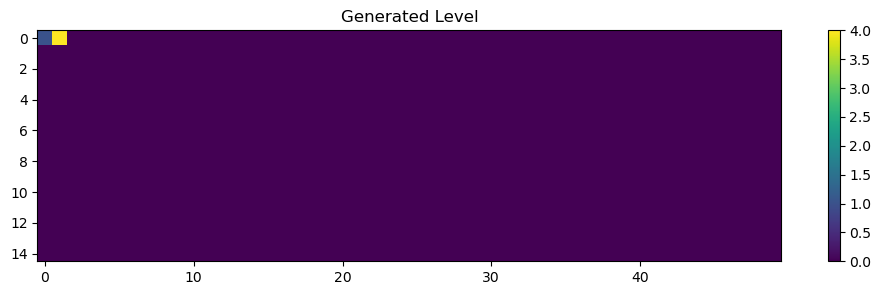

Epoch 43/200 | Loss: 0.0102


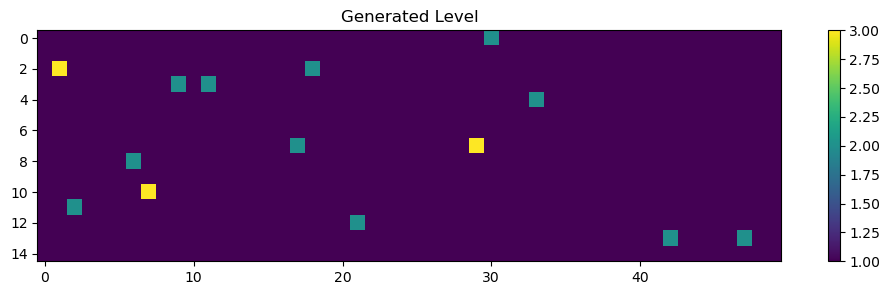

Epoch 44/200 | Loss: 0.0098


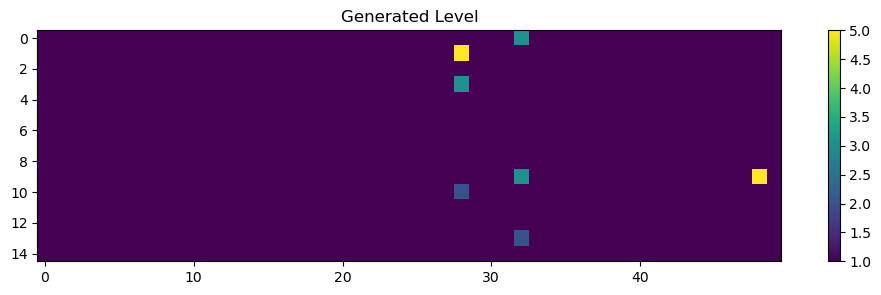

Epoch 45/200 | Loss: 0.0083


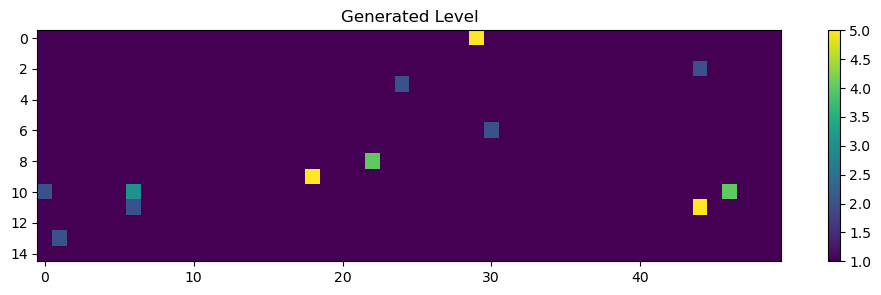

Epoch 46/200 | Loss: 0.0074


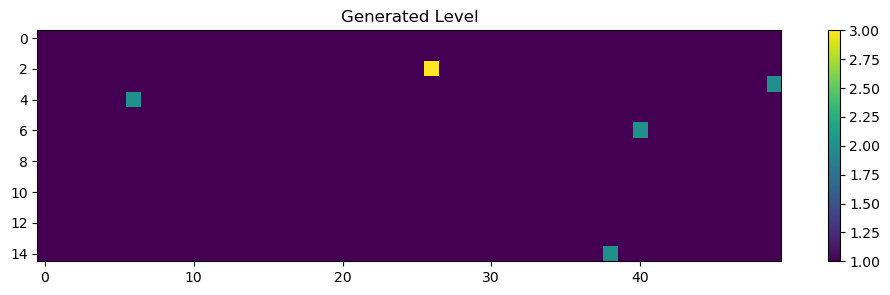

Epoch 47/200 | Loss: 0.0069


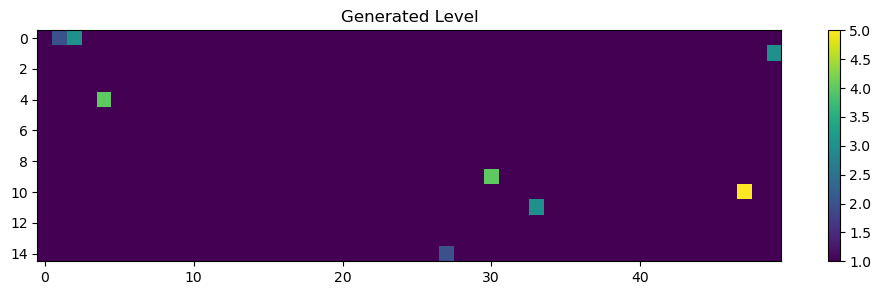

Epoch 48/200 | Loss: 0.0066


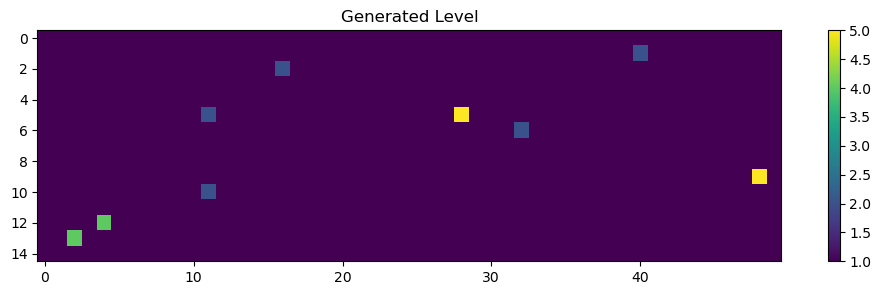

Epoch 49/200 | Loss: 0.0058


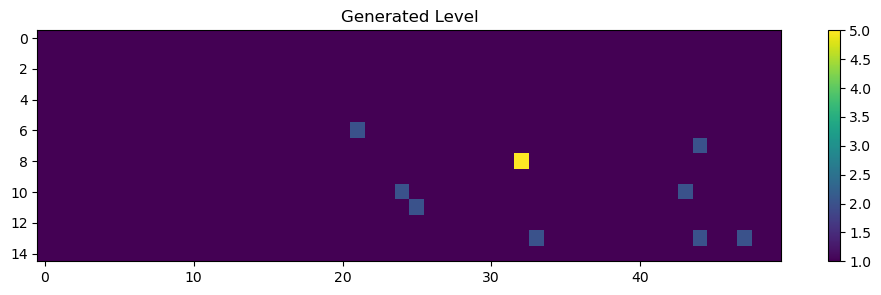

Epoch 50/200 | Loss: 0.0057


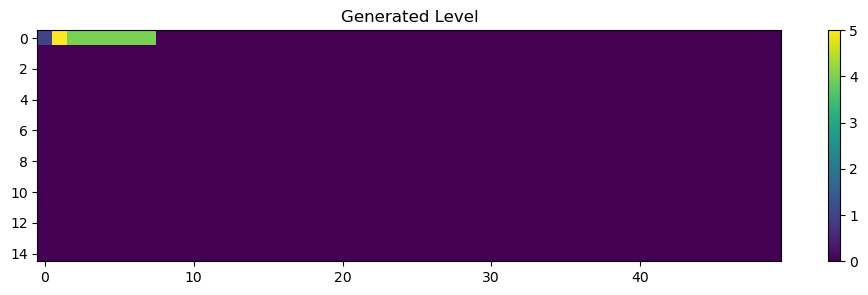

Epoch 51/200 | Loss: 0.0048


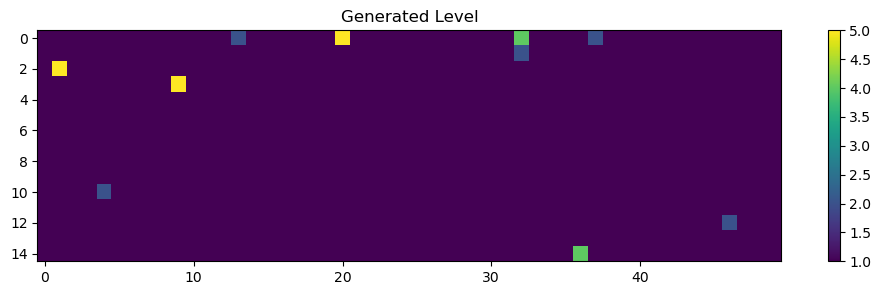

Epoch 52/200 | Loss: 0.0045


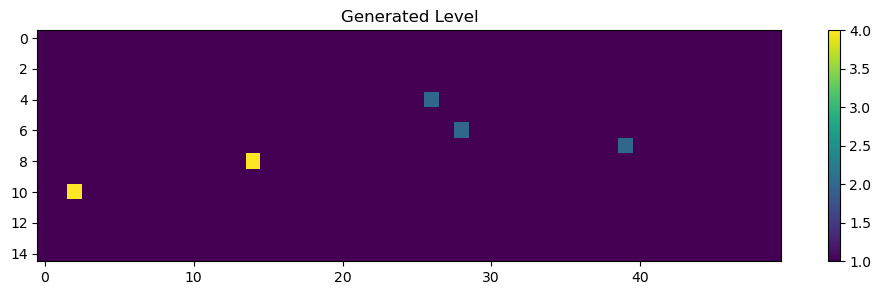

Epoch 53/200 | Loss: 0.0044


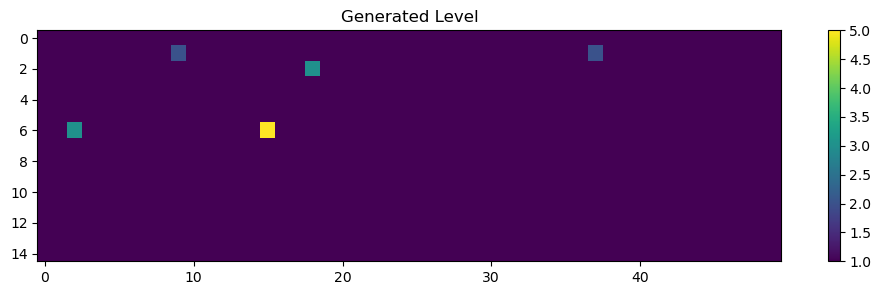

Epoch 54/200 | Loss: 0.0040


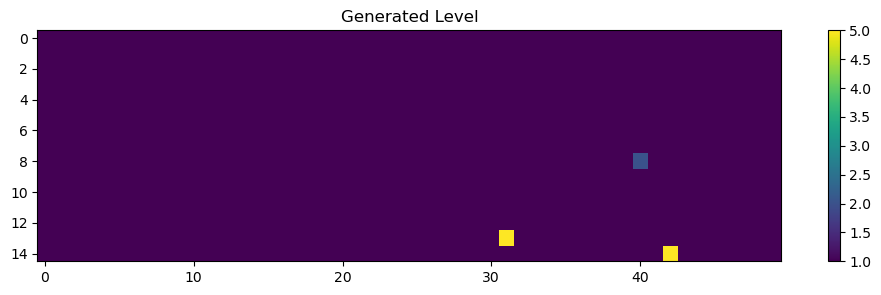

Epoch 55/200 | Loss: 0.0037


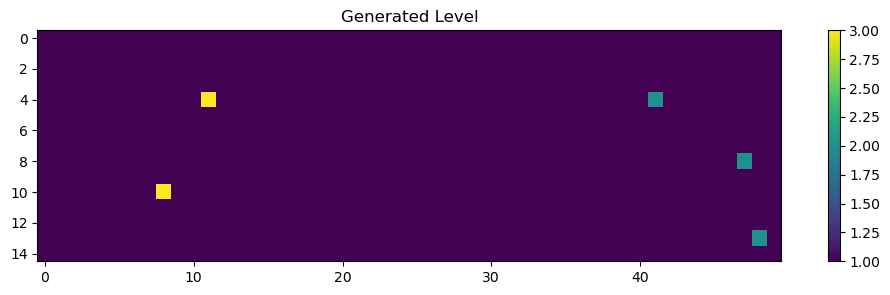

Epoch 56/200 | Loss: 0.0034


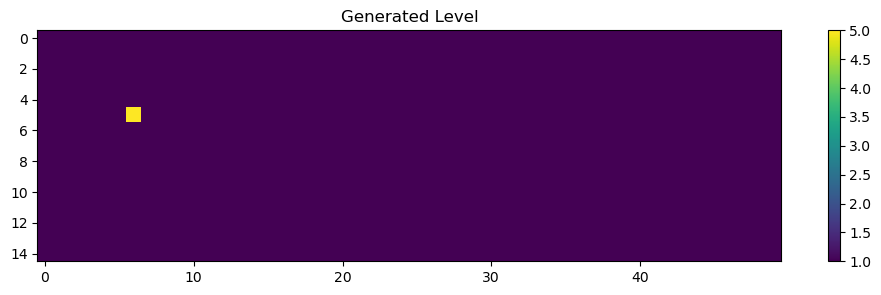

Epoch 57/200 | Loss: 0.0032


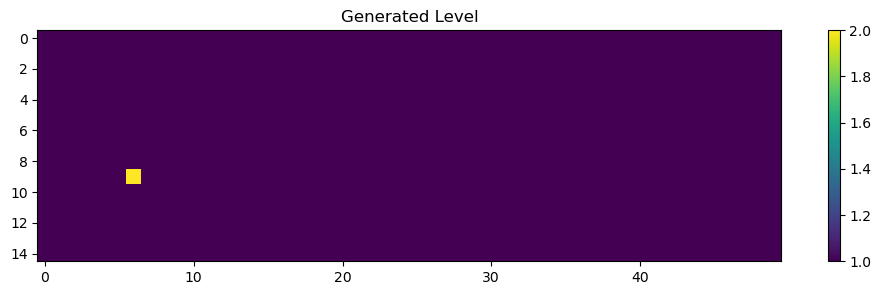

Epoch 58/200 | Loss: 0.0028


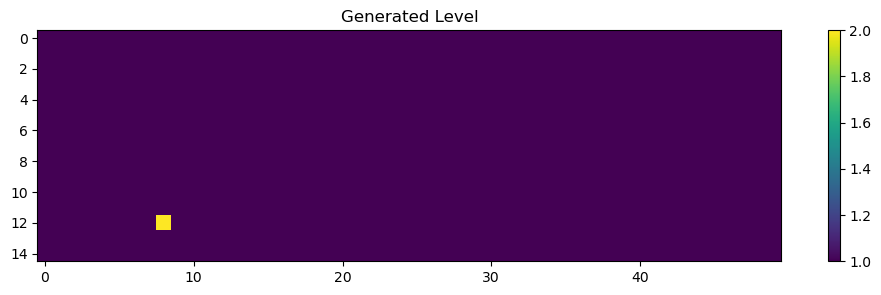

Epoch 59/200 | Loss: 0.0029


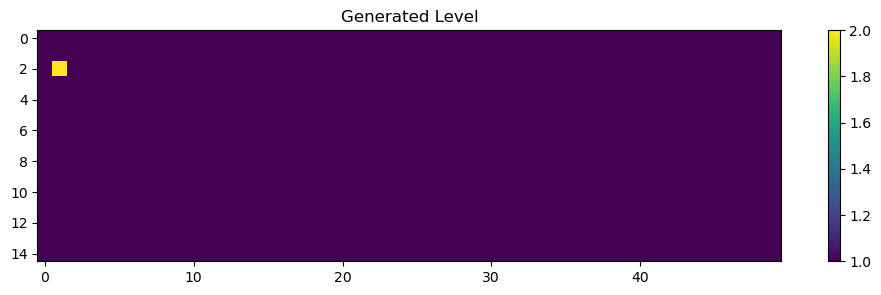

Epoch 60/200 | Loss: 0.0025


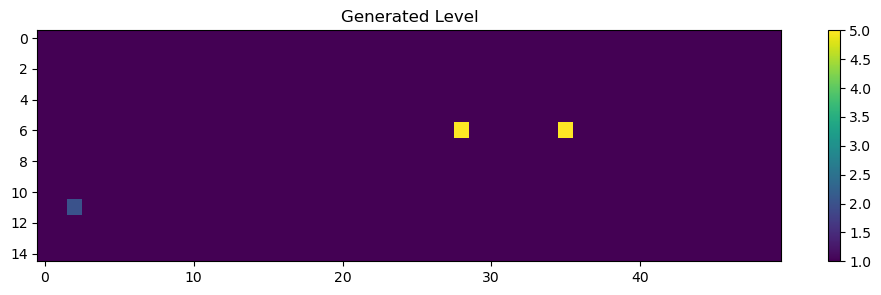

Epoch 61/200 | Loss: 0.0023


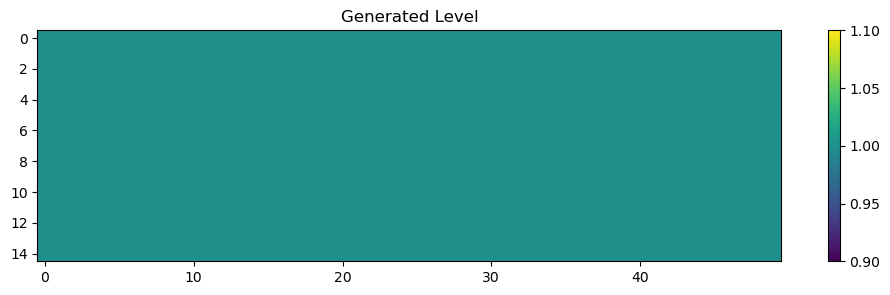

Epoch 62/200 | Loss: 0.0023


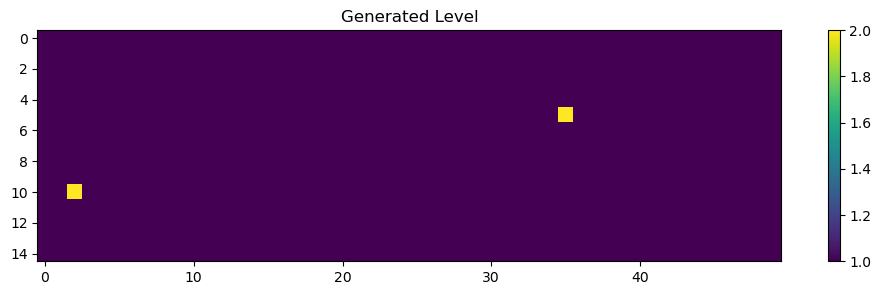

Epoch 63/200 | Loss: 0.0021


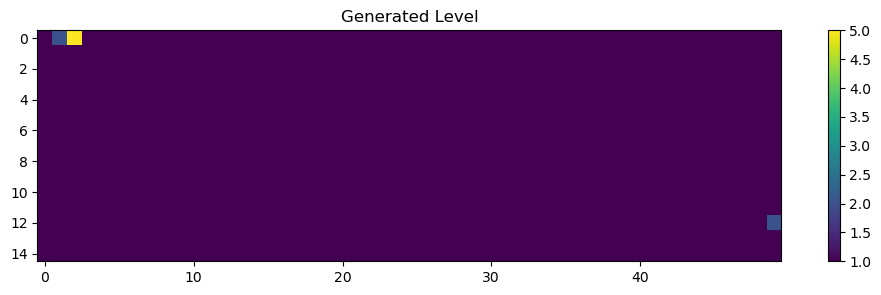

Epoch 64/200 | Loss: 0.0022


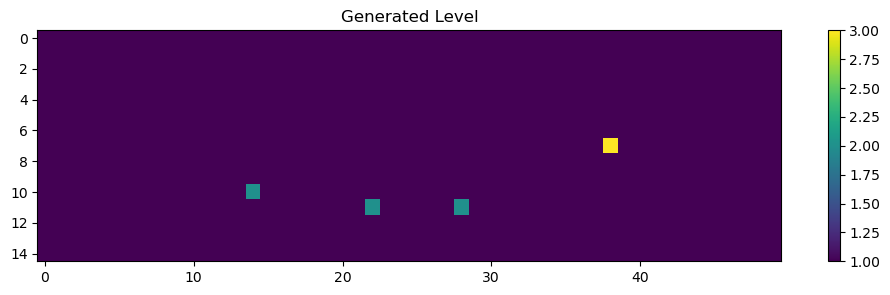

Epoch 65/200 | Loss: 0.0022


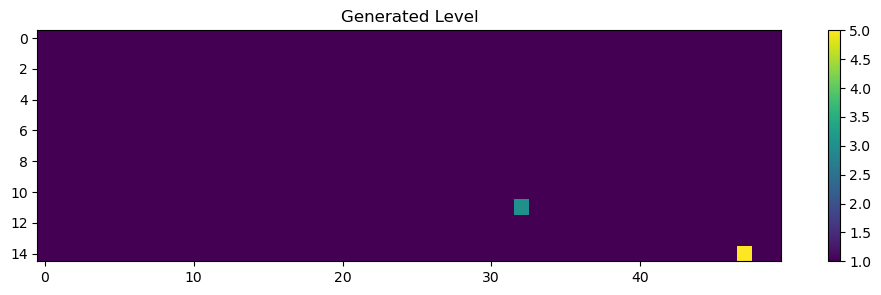

Epoch 66/200 | Loss: 0.0018


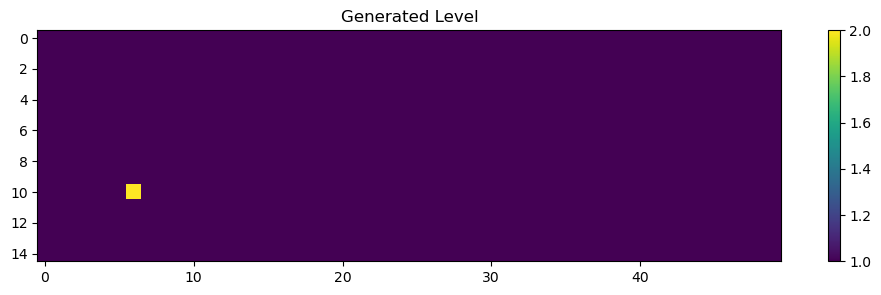

Epoch 67/200 | Loss: 0.0017


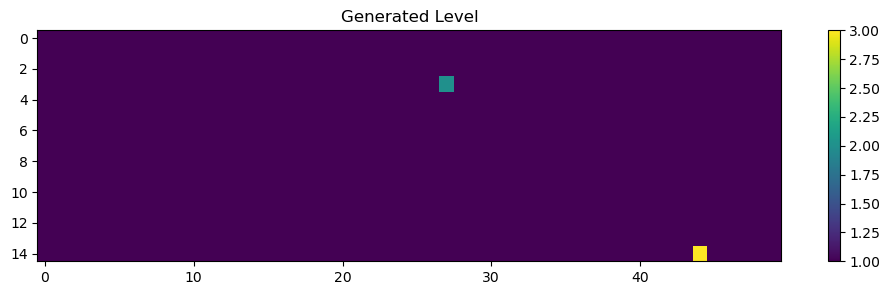

Epoch 68/200 | Loss: 0.0017


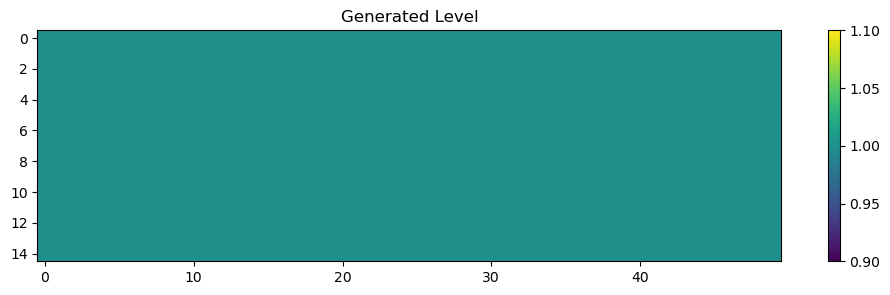

Epoch 69/200 | Loss: 0.0015


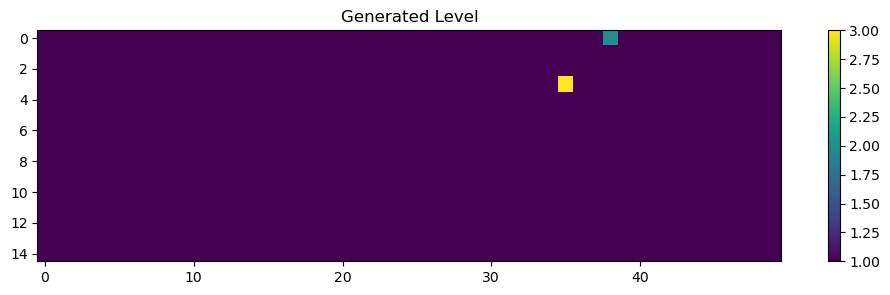

Epoch 70/200 | Loss: 0.0015


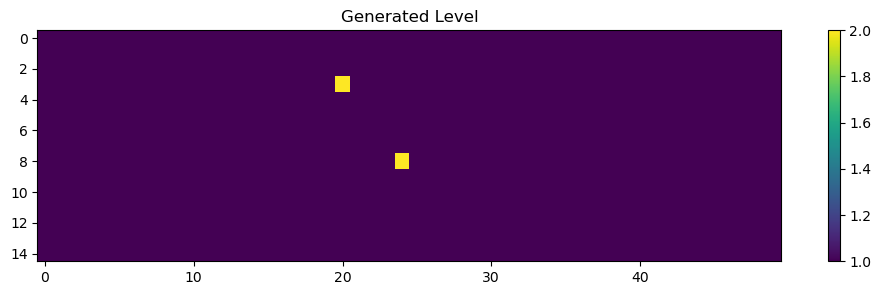

Epoch 71/200 | Loss: 0.0015


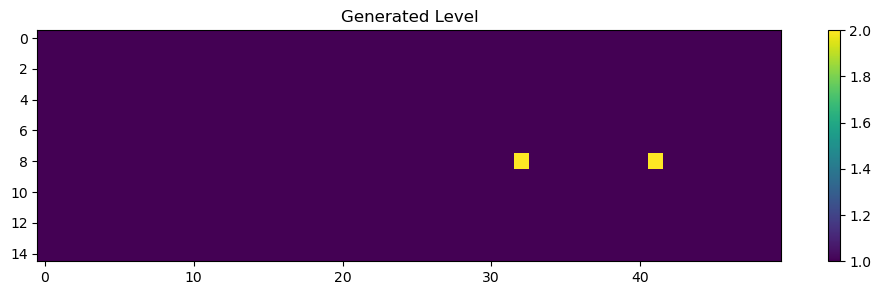

Epoch 72/200 | Loss: 0.0013


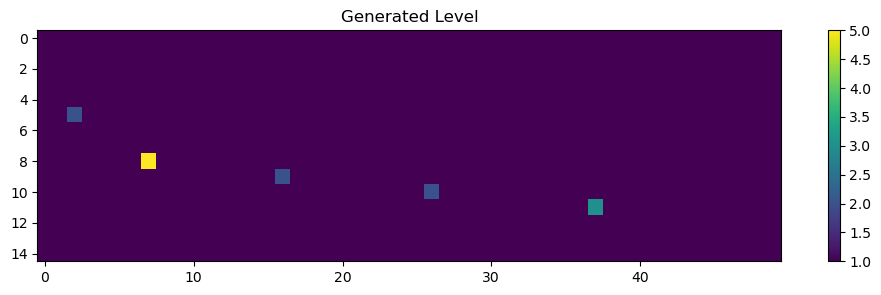

Epoch 73/200 | Loss: 0.0013


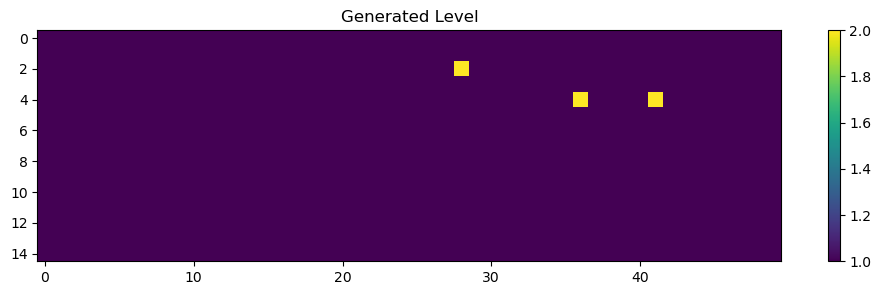

Epoch 74/200 | Loss: 0.0013


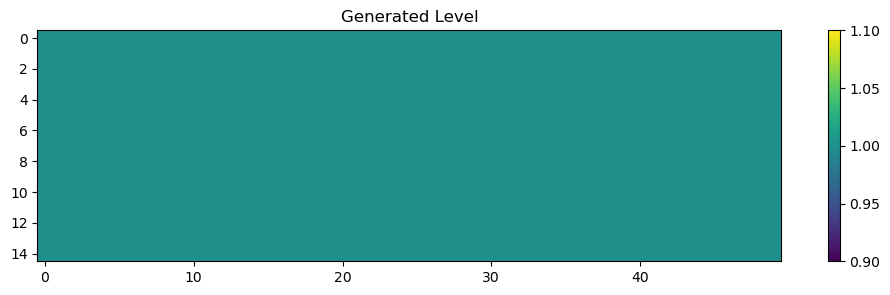

Epoch 75/200 | Loss: 0.0012


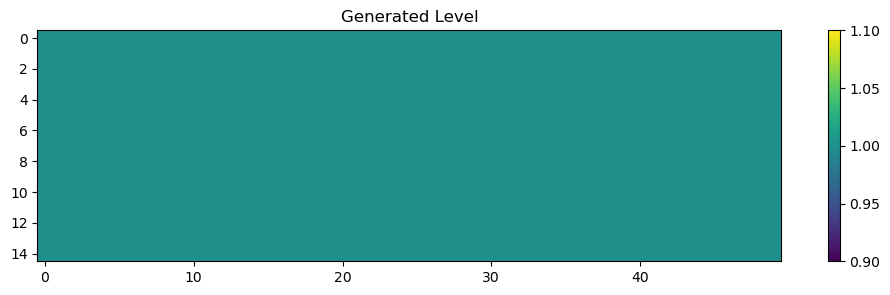

Epoch 76/200 | Loss: 0.0011


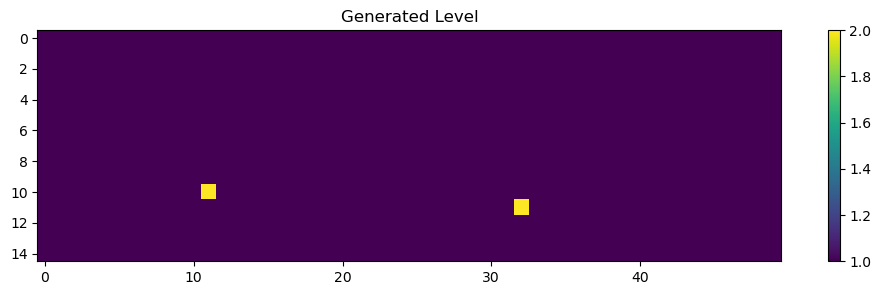

Epoch 77/200 | Loss: 0.0011


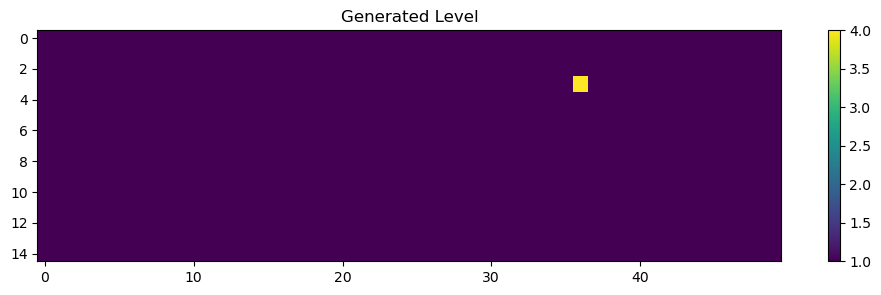

Epoch 78/200 | Loss: 0.0011


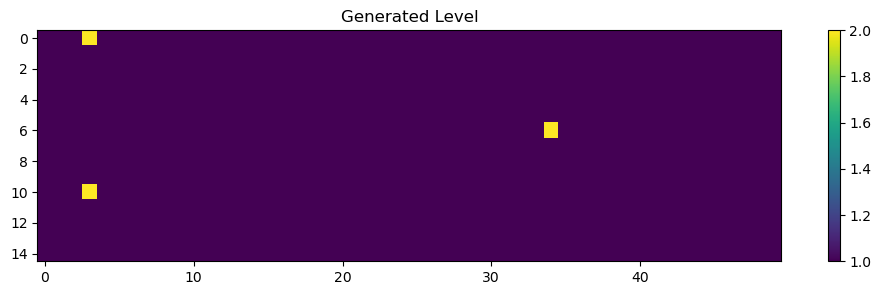

Epoch 79/200 | Loss: 0.0011


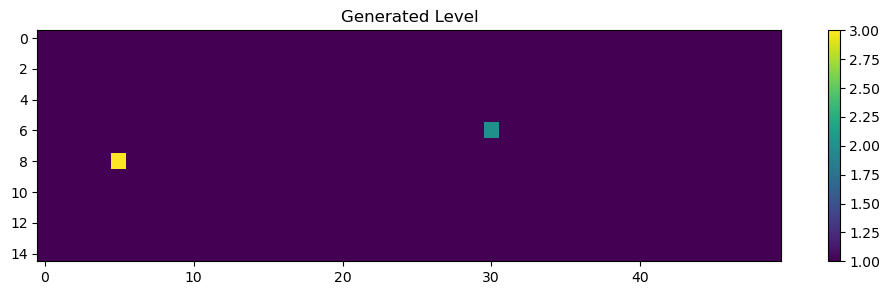

Epoch 80/200 | Loss: 0.0010


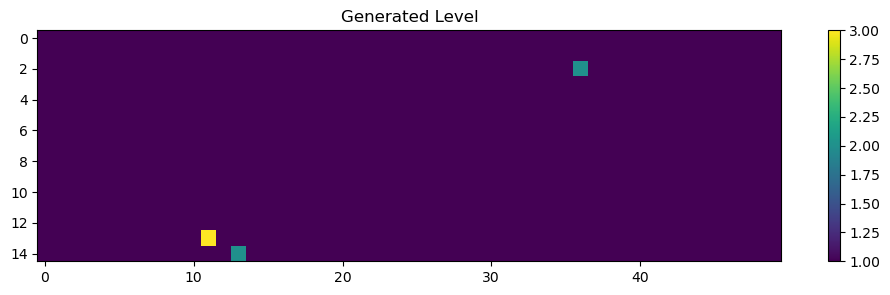

Epoch 81/200 | Loss: 0.0008


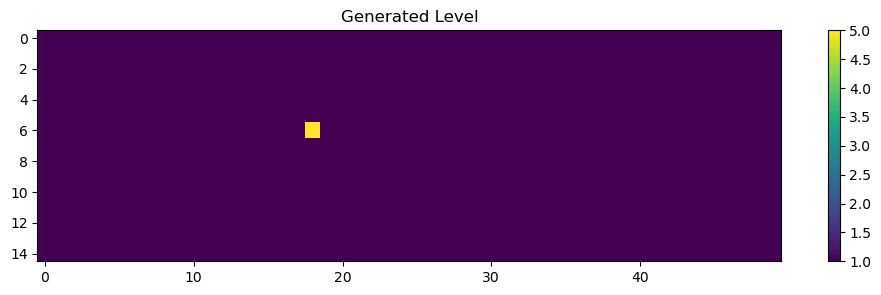

Epoch 82/200 | Loss: 0.0009


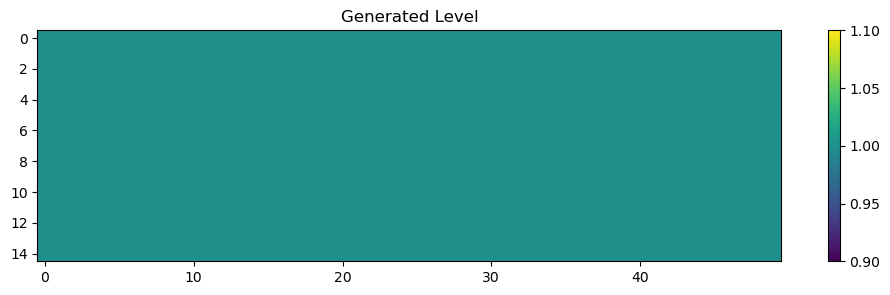

Epoch 83/200 | Loss: 0.0009


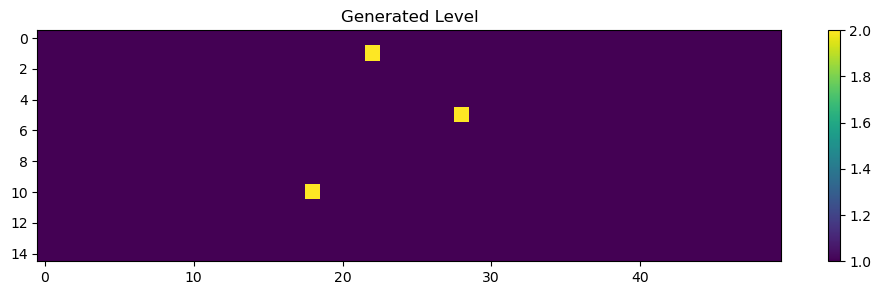

Epoch 84/200 | Loss: 0.0010


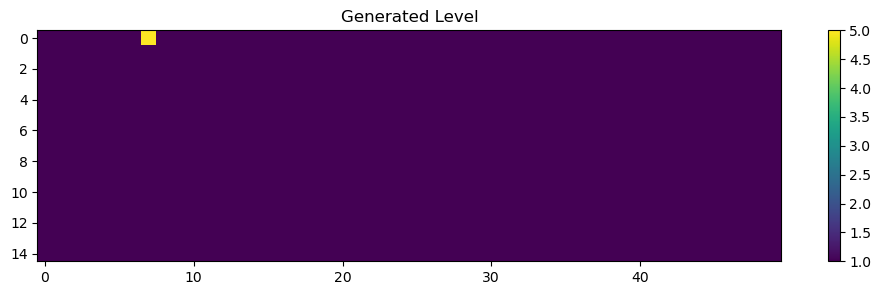

Epoch 85/200 | Loss: 0.0008


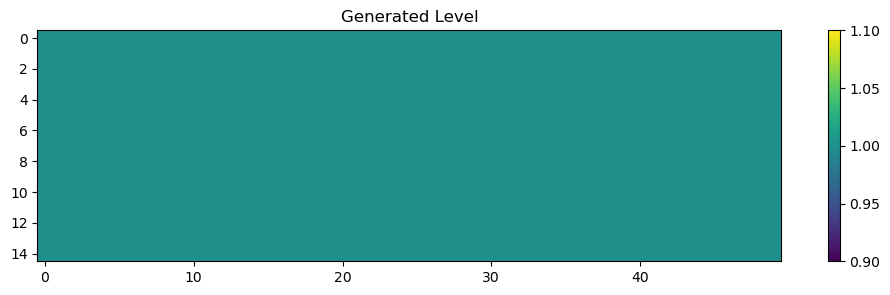

Epoch 86/200 | Loss: 0.0009


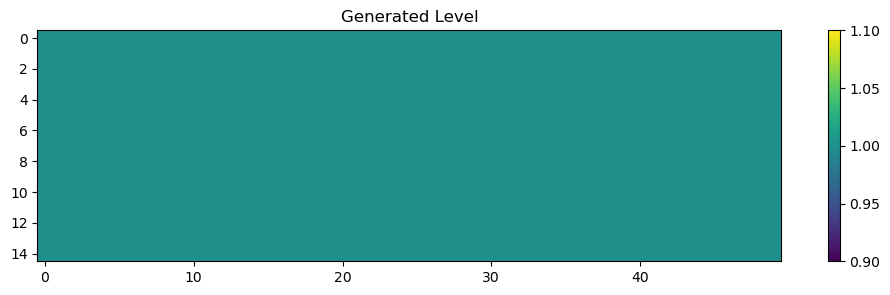

Epoch 87/200 | Loss: 0.0008


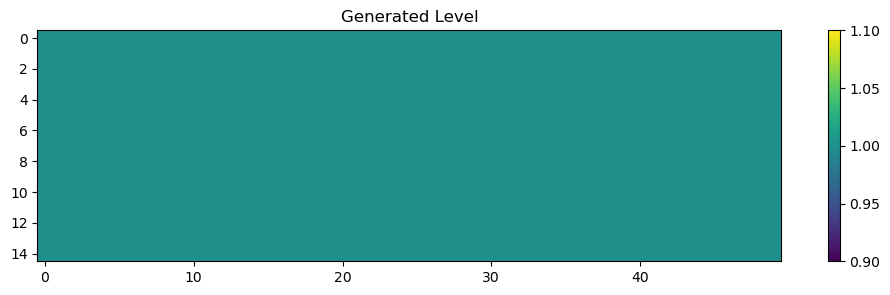

Epoch 88/200 | Loss: 0.0009


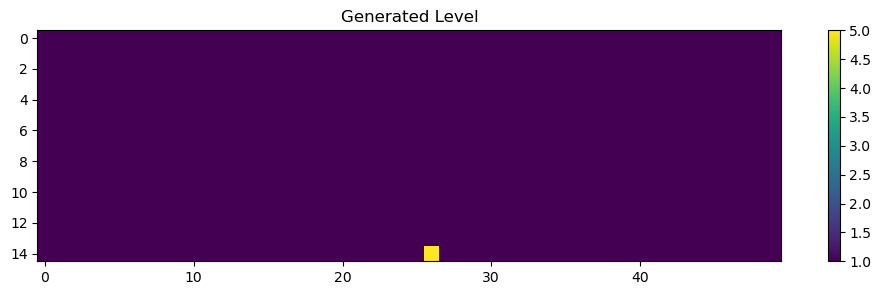

Epoch 89/200 | Loss: 0.0008


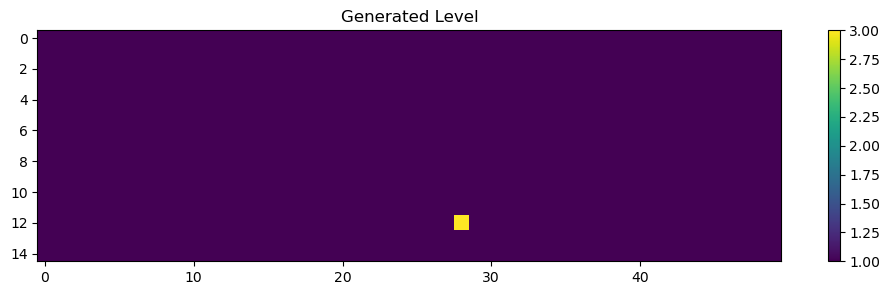

Epoch 90/200 | Loss: 0.0007


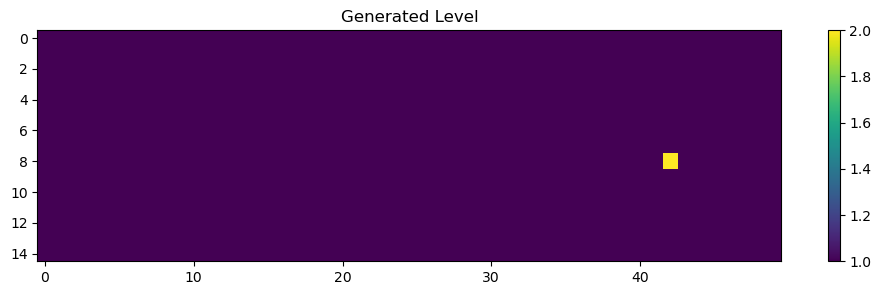

Epoch 91/200 | Loss: 0.0008


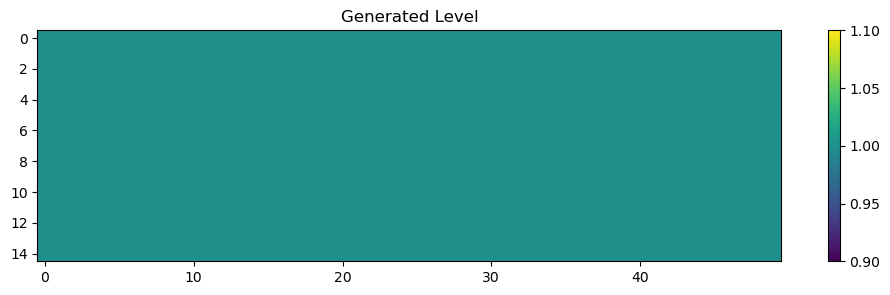

Epoch 92/200 | Loss: 0.0008


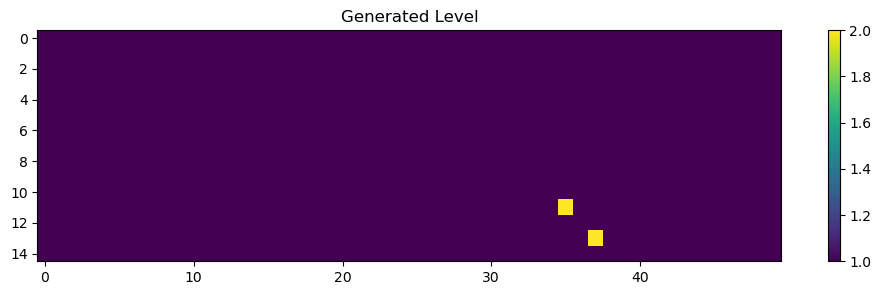

Epoch 93/200 | Loss: 0.0008


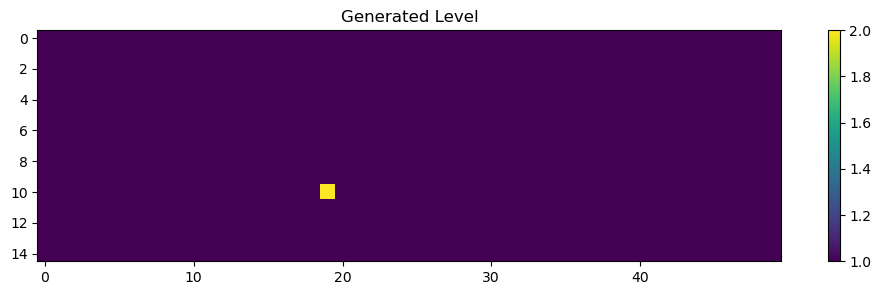

Epoch 94/200 | Loss: 0.0009


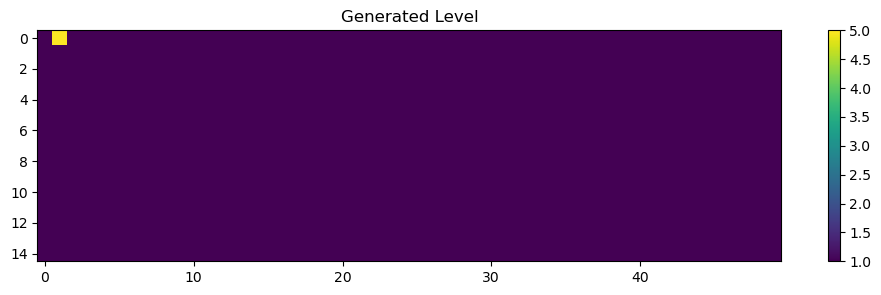

Epoch 95/200 | Loss: 0.0008


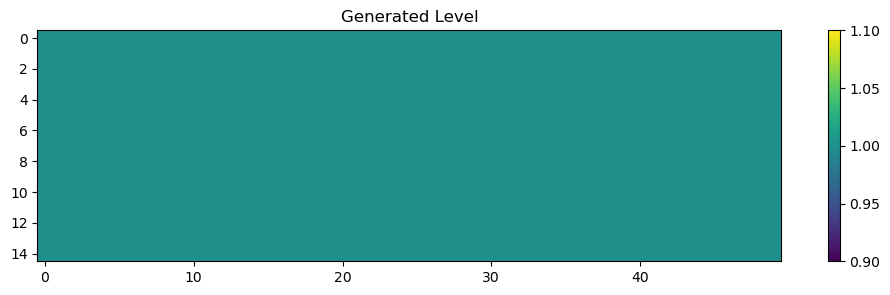

Epoch 96/200 | Loss: 0.0007


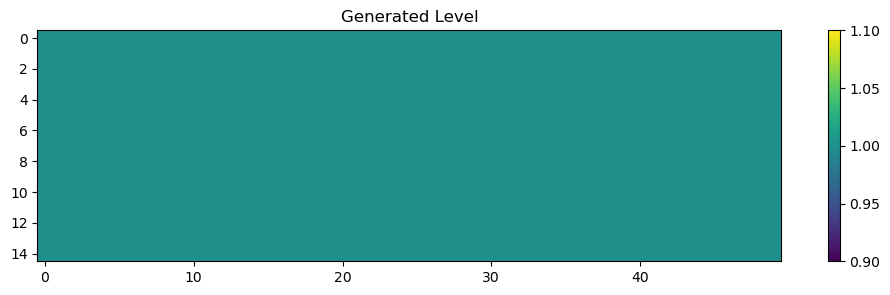

Epoch 97/200 | Loss: 0.0007


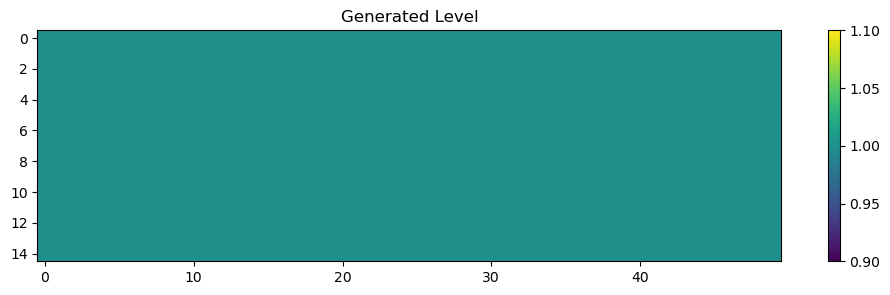

Epoch 98/200 | Loss: 0.0007


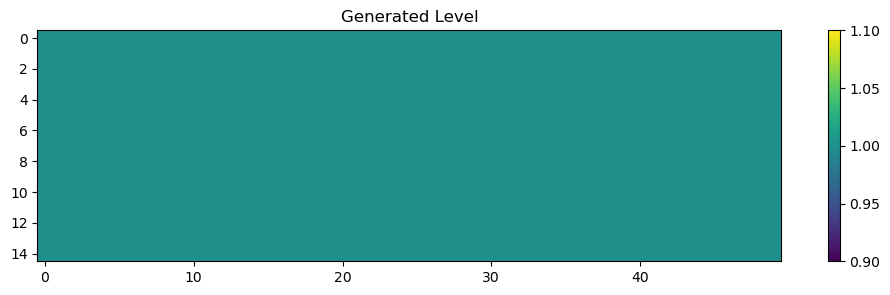

Epoch 99/200 | Loss: 0.0006


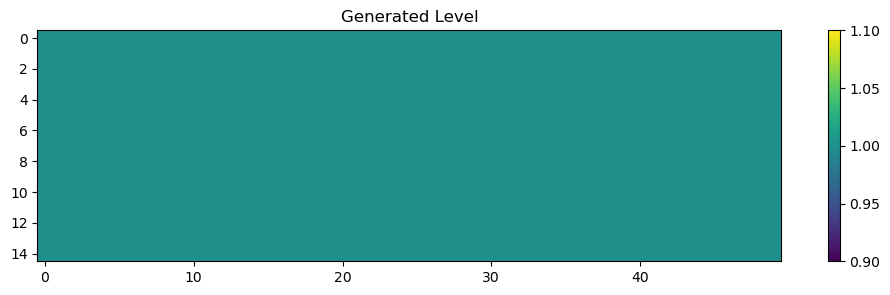

Epoch 100/200 | Loss: 0.0007


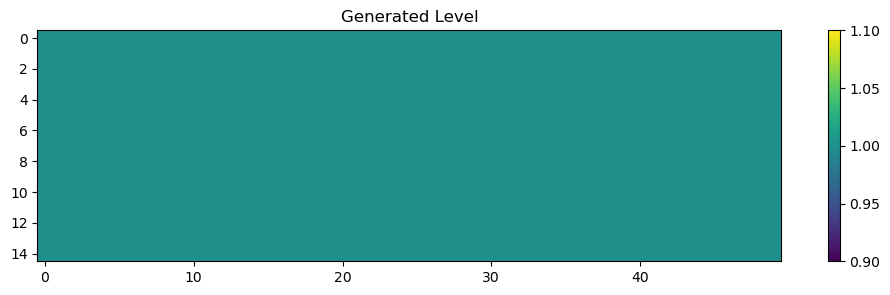

Epoch 101/200 | Loss: 0.0007


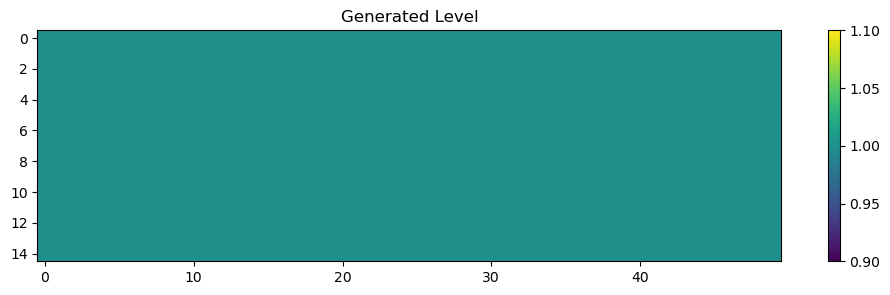

Epoch 102/200 | Loss: 0.0009


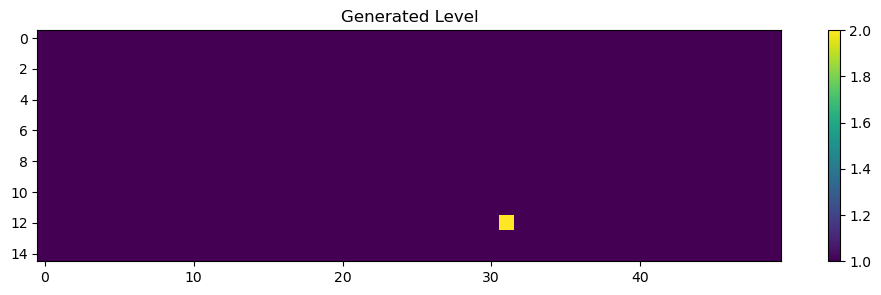

Epoch 103/200 | Loss: 0.0007


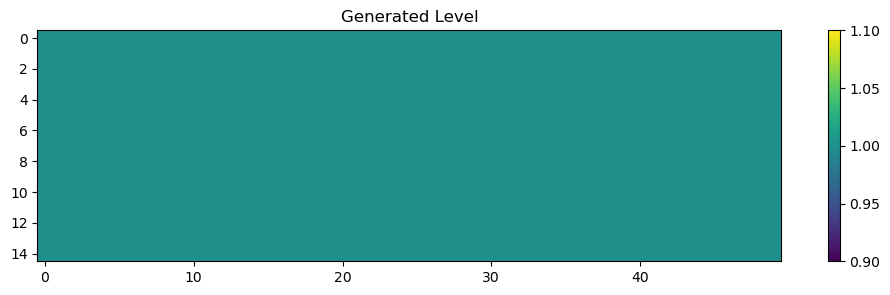

Epoch 104/200 | Loss: 0.0006


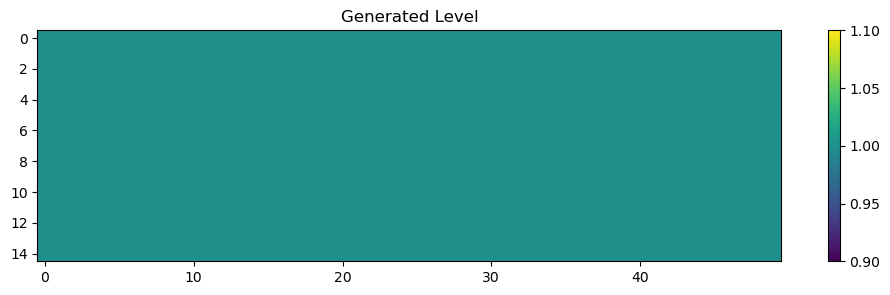

Epoch 105/200 | Loss: 0.0006


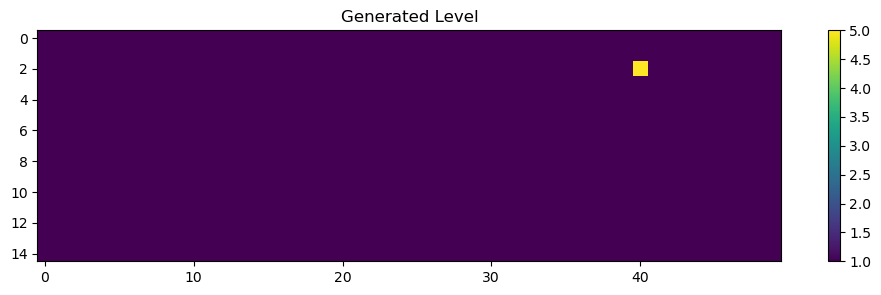

Epoch 106/200 | Loss: 0.0006


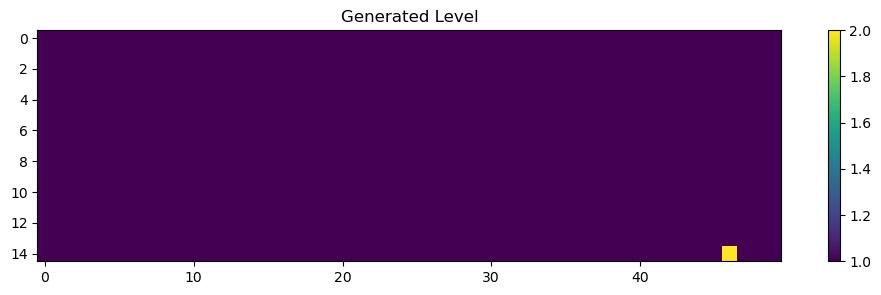

Epoch 107/200 | Loss: 0.0006


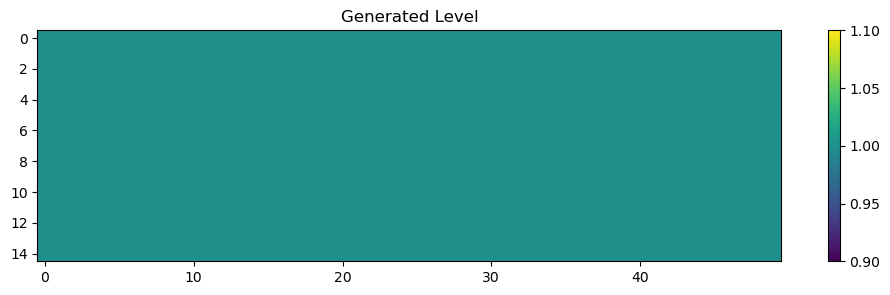

Epoch 108/200 | Loss: 0.0006


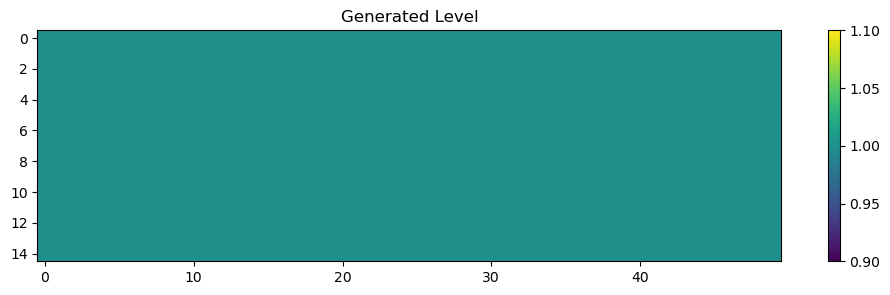

Epoch 109/200 | Loss: 0.0006


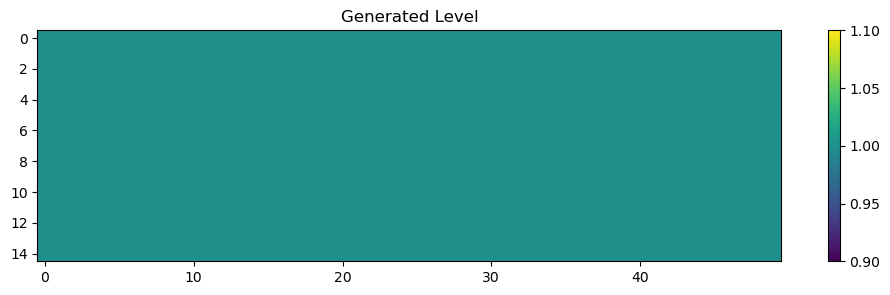

Epoch 110/200 | Loss: 0.0006


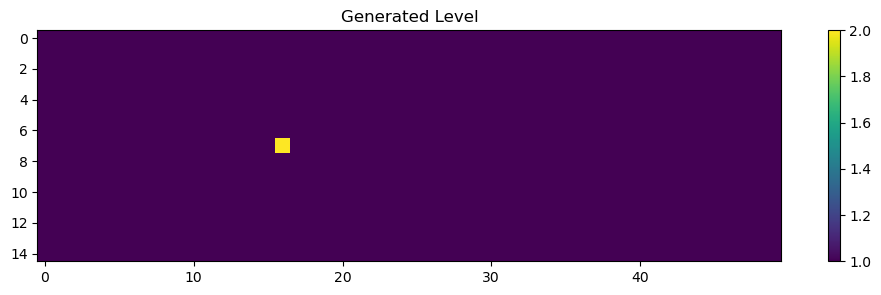

Epoch 111/200 | Loss: 0.0006


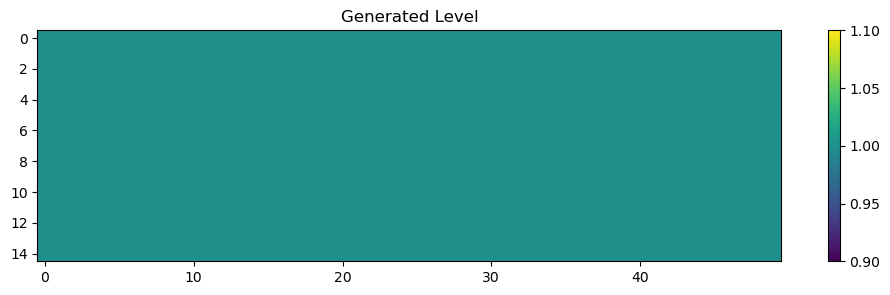

Epoch 112/200 | Loss: 0.0007


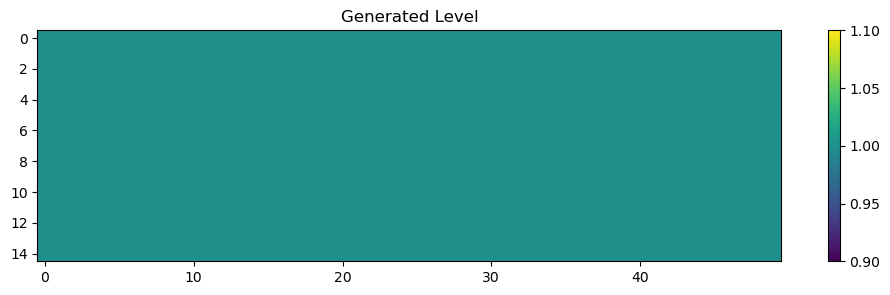

Epoch 113/200 | Loss: 0.0006


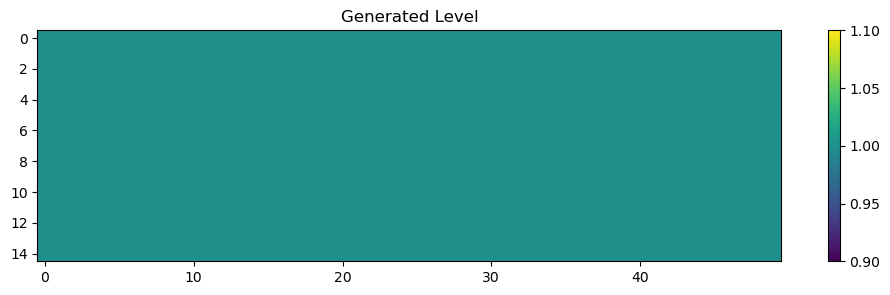

Epoch 114/200 | Loss: 0.0006


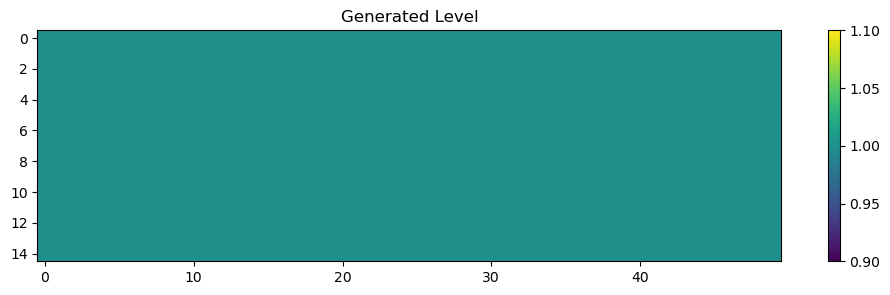

Epoch 115/200 | Loss: 0.0006


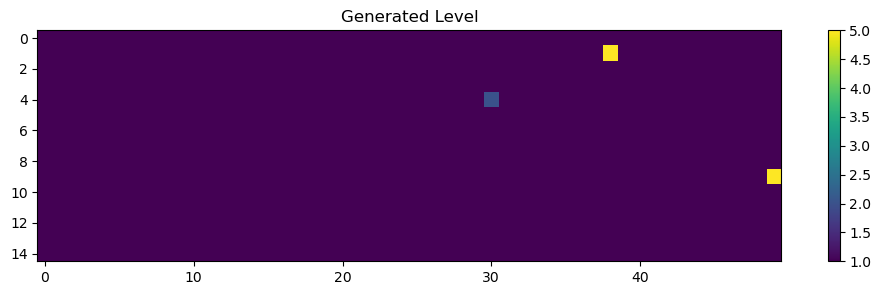

Epoch 116/200 | Loss: 0.0005


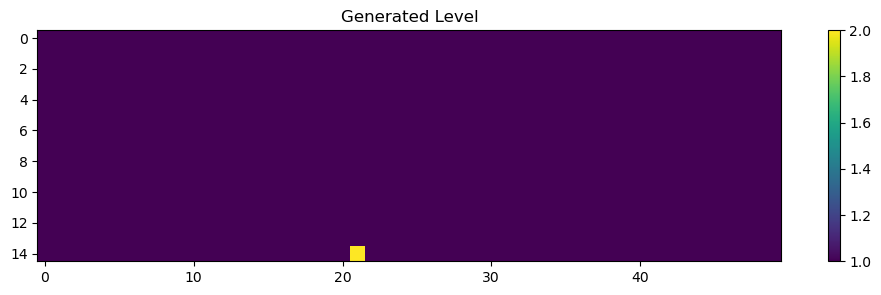

Epoch 117/200 | Loss: 0.0006


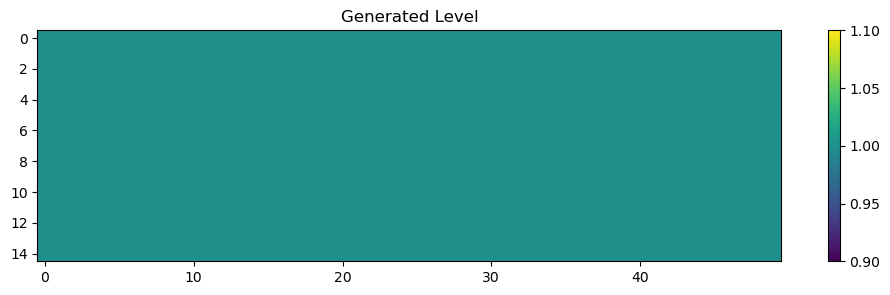

Epoch 118/200 | Loss: 0.0005


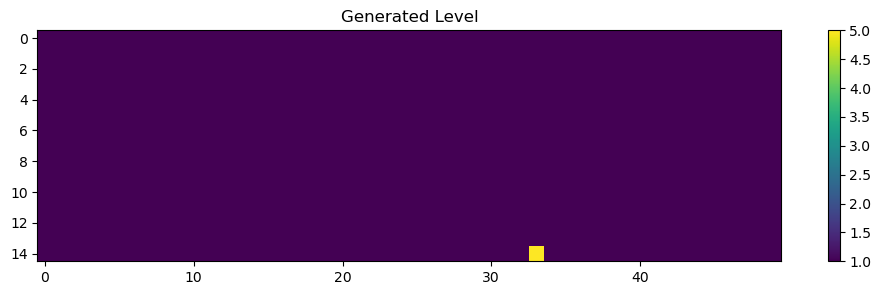

Epoch 119/200 | Loss: 0.0005


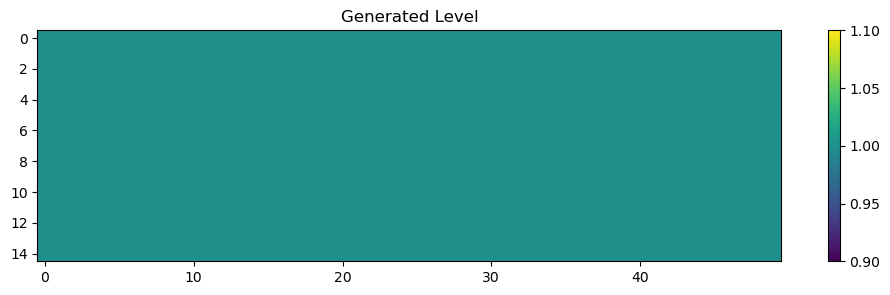

Epoch 120/200 | Loss: 0.0006


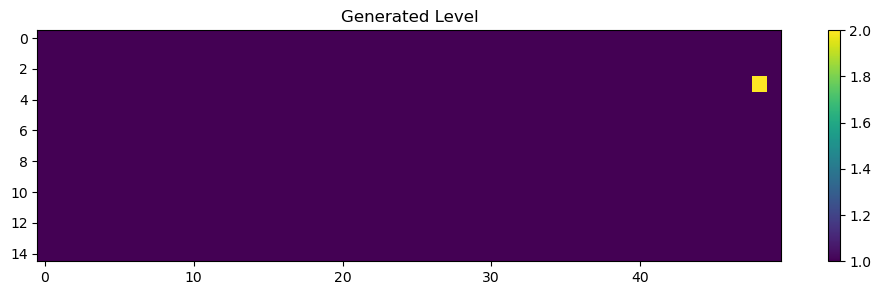

Epoch 121/200 | Loss: 0.0006


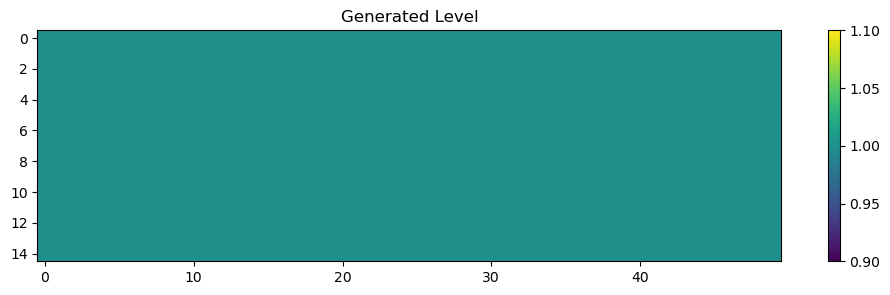

Epoch 122/200 | Loss: 0.0004


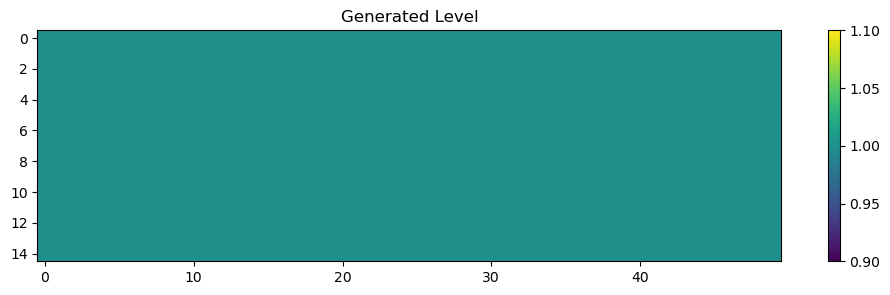

Epoch 123/200 | Loss: 0.0004


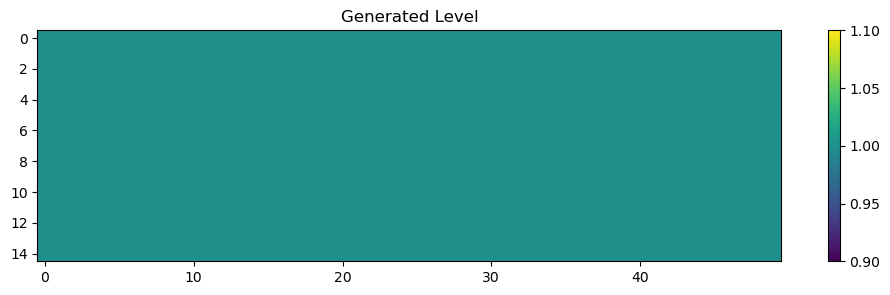

Epoch 124/200 | Loss: 0.0006


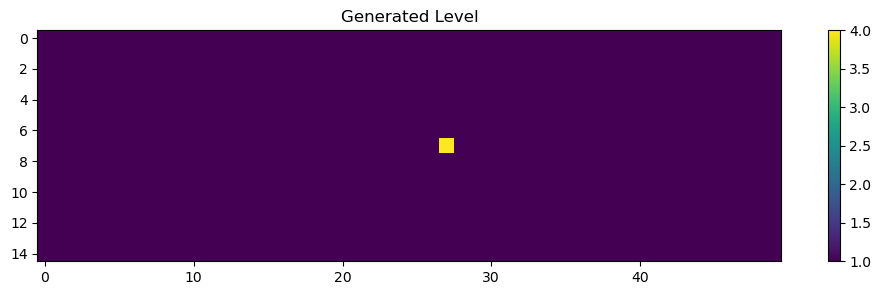

Epoch 125/200 | Loss: 0.0006


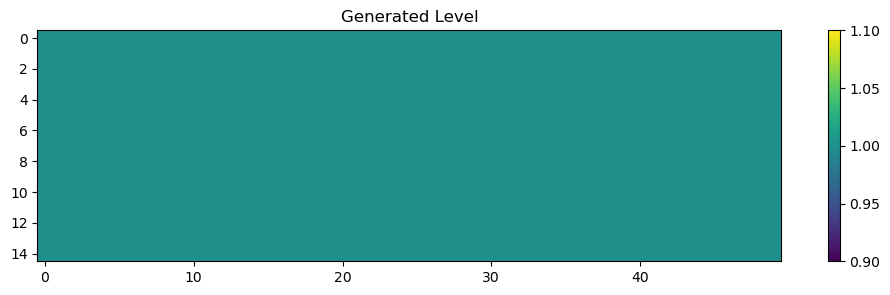

Epoch 126/200 | Loss: 0.0005


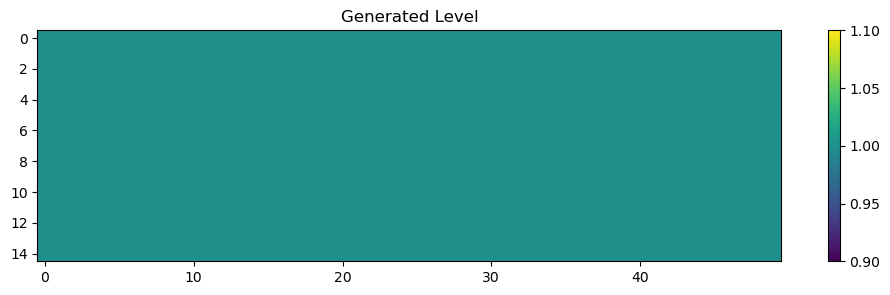

Epoch 127/200 | Loss: 0.0004


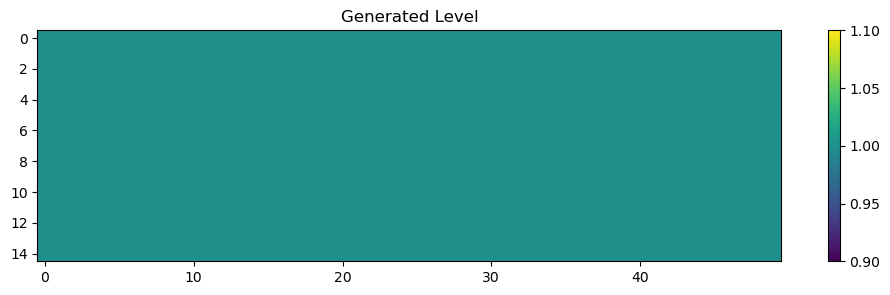

Epoch 128/200 | Loss: 0.0005


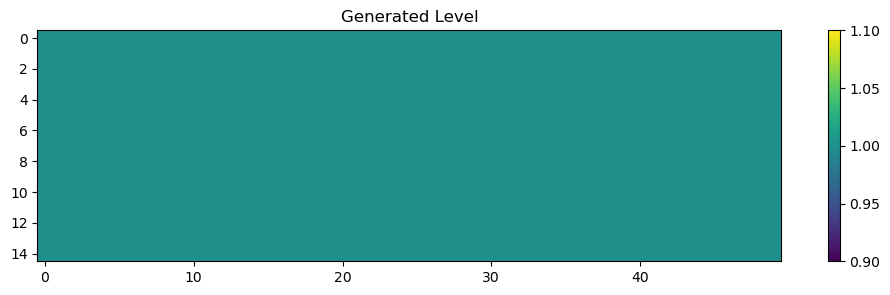

Epoch 129/200 | Loss: 0.0004


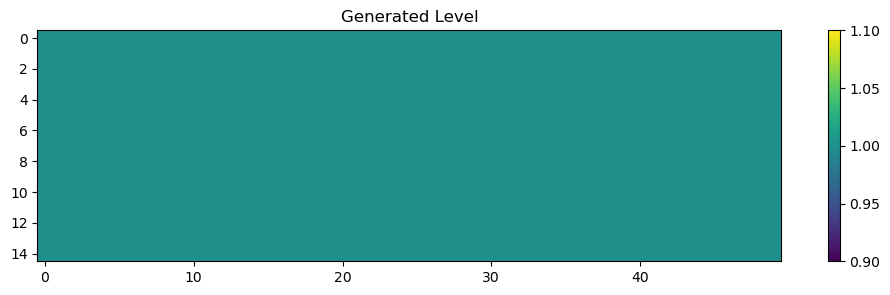

Epoch 130/200 | Loss: 0.0005


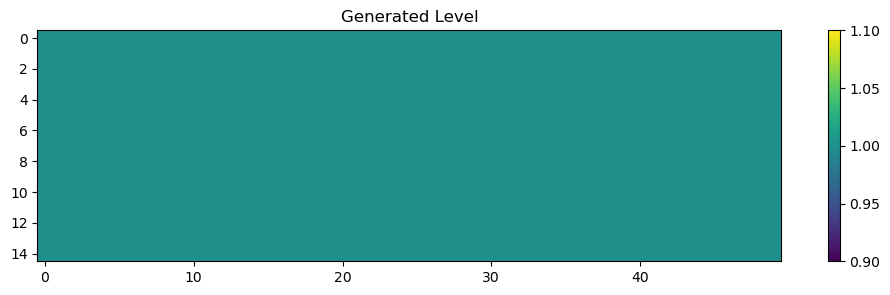

Epoch 131/200 | Loss: 0.0004


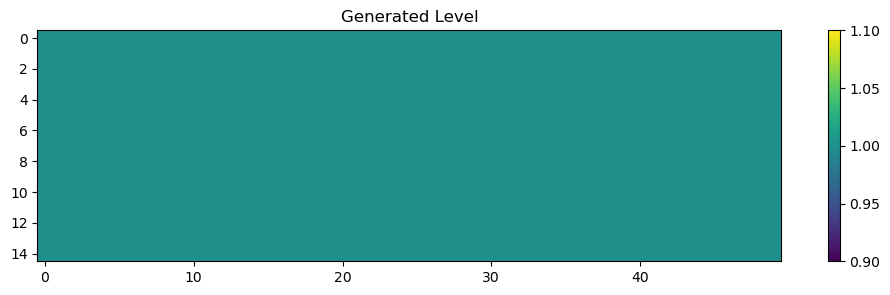

Epoch 132/200 | Loss: 0.0005


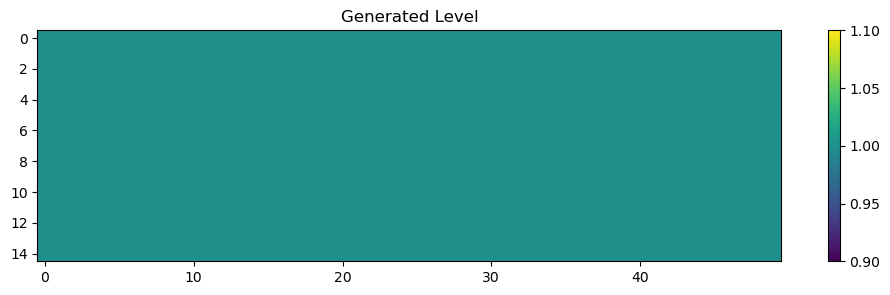

Epoch 133/200 | Loss: 0.0006


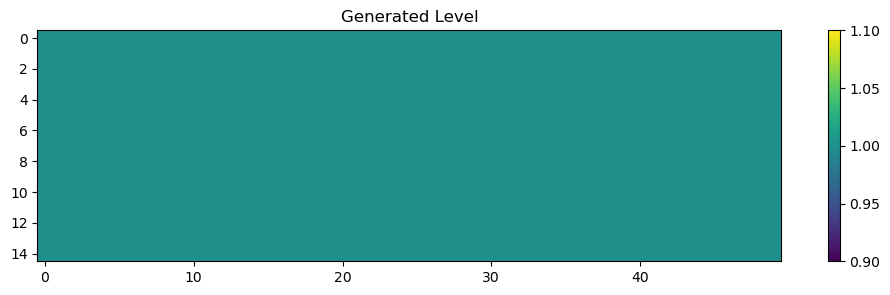

Epoch 134/200 | Loss: 0.0004


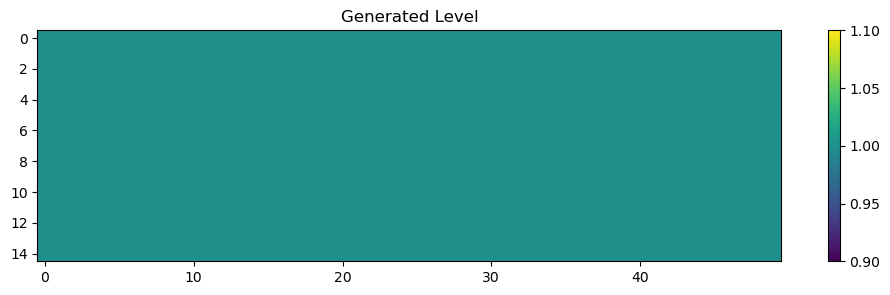

Epoch 135/200 | Loss: 0.0005


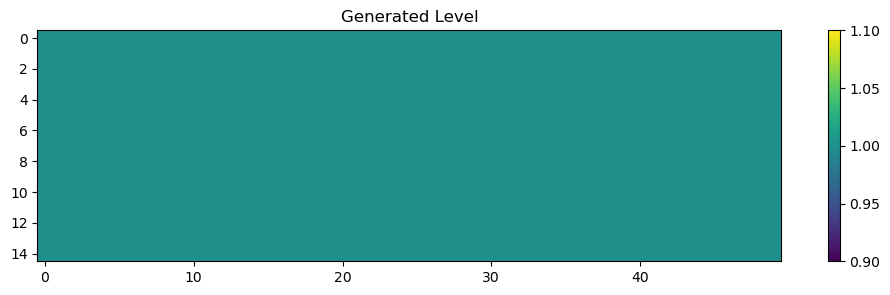

Epoch 136/200 | Loss: 0.0006


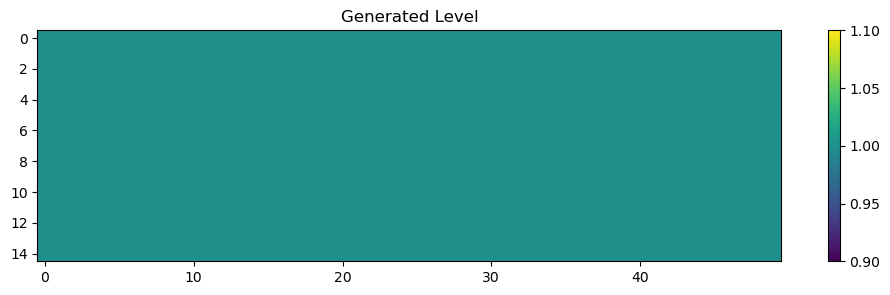

Epoch 137/200 | Loss: 0.0005


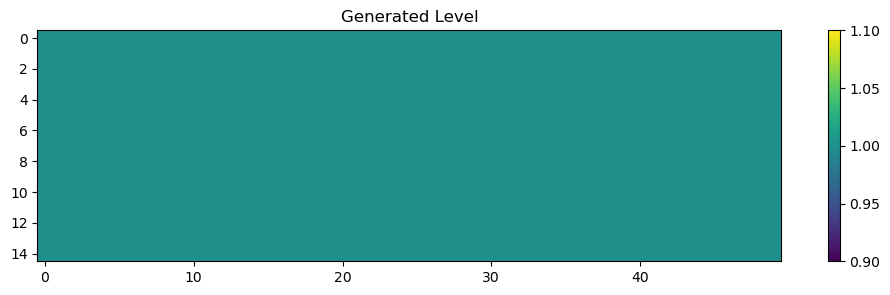

Epoch 138/200 | Loss: 0.0004


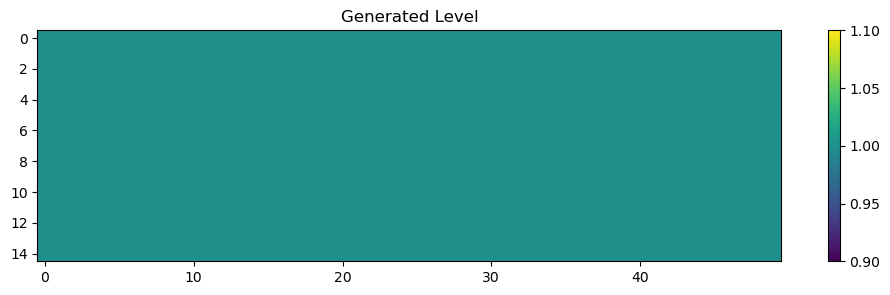

KeyboardInterrupt: 

In [6]:
# Level Transformer: Training to Generate 2D Levels
# ================================================
# Install any missing libraries
# !pip install torch torchvision


# Set random seeds for reproducibility
torch.manual_seed(42)
random.seed(42)

# ========== DATA ==========

# Example data
# Each level is a sequence of 50x15 = 750 tiles


# Simulate a dataset: 500 levels
dataset = []
for level in levels:
    flat = [int(i) - 1 for i in level.flatten().tolist()]  # Shift each tile value down by 1
    dataset.append(flat)


# Add your real levels to `dataset` instead of randoms

# Build vocabulary (tile IDs)
tile_vocab = list(set([tile for level in dataset for tile in level]))
tile_vocab_size = max(tile_vocab) + 1    # assume IDs start from 0 or 1

print(tile_vocab_size)

# ========== DATASET CLASS ==========

class LevelDataset(Dataset):
    def __init__(self, levels):
        self.levels = levels

    def __len__(self):
        return len(self.levels)

    def __getitem__(self, idx):
        level = torch.tensor(self.levels[idx], dtype=torch.long)
        return level[:-1], level[1:]  # input sequence, target sequence

train_dataset = LevelDataset(dataset)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# ========== MODEL ==========

class LevelTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim=256, num_heads=16, num_layers=8, ff_dim=1024):
        super(LevelTransformer, self).__init__()
        
        # Token and position embeddings
        self.token_emb = nn.Embedding(vocab_size, embed_dim)
        self.pos_emb = nn.Embedding(1000, embed_dim)  # Positions up to 1000 tokens

        # Transformer Decoder Layer
        transformer_layer = nn.TransformerDecoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dim_feedforward=ff_dim,  # Increased feedforward layer size
            activation='gelu',  # GELU activation function
            dropout=0.2  # Adding dropout for regularization
        )
        
        # Transformer Decoder with increased layers
        self.transformer = nn.TransformerDecoder(transformer_layer, num_layers=num_layers)
        
        # Output layer
        self.fc_out = nn.Linear(embed_dim, vocab_size)
        
        # Layer normalization for stabilization
        self.layer_norm = nn.LayerNorm(embed_dim)

    def forward(self, x):
        B, T = x.size()
        
        # Token and positional embeddings
        token_embeddings = self.token_emb(x)
        positions = torch.arange(0, T, device=x.device).unsqueeze(0)
        pos_embeddings = self.pos_emb(positions)
        
        # Combine token and position embeddings
        x_emb = token_embeddings + pos_embeddings
        
        # Pass through transformer
        tgt_mask = nn.Transformer.generate_square_subsequent_mask(T).to(x.device)
        out = self.transformer(x_emb.transpose(0, 1), x_emb.transpose(0, 1), tgt_mask=tgt_mask)
        
        # Layer normalization and output layer
        out = self.layer_norm(out.transpose(0, 1))
        out = self.fc_out(out)
        
        return out



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LevelTransformer(vocab_size=tile_vocab_size).to(device)



# ========== GENERATION FUNCTION ==========

def generate_level(model, start_tile=1, max_length=750):
    model.eval()
    generated = [start_tile]
    for _ in range(max_length-1):
        x = torch.tensor(generated, dtype=torch.long, device=device).unsqueeze(0)
        with torch.no_grad():
            logits = model(x)
            next_token_logits = logits[0, -1]
            probs = nn.functional.softmax(next_token_logits, dim=-1)
            next_token = torch.multinomial(probs, num_samples=1)
            generated.append(next_token.item())
    return generated


# ========== TRAINING ==========

optimizer = optim.Adam(model.parameters(), lr=0.0005*0.6)
criterion = nn.CrossEntropyLoss()

num_epochs = 200

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits.view(-1, tile_vocab_size), y.view(-1))
        loss.backward()
        optimizer.step()

        total_loss += loss.detach().item()

    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {total_loss/len(train_loader):.4f}")
    plot_level(generate_level(model))


# ========== GENERATE LEVELS ==========

# Generate 3 example levels
generated_levels = []
for _ in range(3):
    new_level = generate_level(model)
    generated_levels.append(new_level)


for idx, level in enumerate(generated_levels):
    plot_level(level, title=f"Generated Level {idx+1}")



In [ ]:
plot_level(dataset[5])